## Data understanding

### Summary

In [3]:
import pandas as pd


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
df = pd.read_excel(file_path)


In [4]:
summary_df = df.describe(include='all')

In [5]:
# faccio un summary di tutte le variabili per avere un primo generico sguardo d'insieme 

summary_df

male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4240.000000  4240.000000    4240.000000  4211.000000  4187.000000   
mean      0.429245    49.580189       0.494104     9.005937     0.029615   
std       0.495027     8.572942       0.500024    11.922462     0.169544   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4240.000000  4190.000000  4240.000000  4240.000000  4221.000000   
mean      0.025708   236.699523   132.354599    82.897759    25.800801   
std       0.158280    44.591284    22.033300    11.910394     4.079840   
min       0.000000   107.000000    83.500000    48.000000    15.540000   
25%       0.000000   206.000000   117.000000    75.000000    23.070000   
50%       0.000000   234.000000   128.000000    82.000000    25.400000   
75%       0.000000   263.000000   144.000000    90.000000    28.040000   
max       1.000000   696.000000   295.000000   142.500000    56.800000   

         heartRate      glucose         Risk  
count  4239.000000  3852.000000  4240.000000  
mean     75.878981    81.963655     0.310613  
std      12.025348    23.954335     0.462799  
min      44.000000    40.000000     0.000000  
25%      68.000000    71.000000     0.000000  
50%      75.000000    78.000000     0.000000  
75%      83.000000    87.000000     1.000000  
max     143.000000   394.000000     1.000000

### Data types

In [81]:
import pandas as pd

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

df = pd.read_excel(file_path)

# definisco le variabili

def determine_variable_type(series):
    unique_values = series.nunique()
    if series.name == 'bpmeds':
        return 'Binary Categorical'
    elif pd.api.types.is_numeric_dtype(series):
        if unique_values == 2:
            return 'Binary Categorical'
        elif unique_values < 10:
            return 'Categorical'
        else:
            return 'Numeric'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    else:
        return 'Text'

variable_types = df.apply(determine_variable_type)

print("Tipo di variabile per ciascuna colonna:")
print(variable_types)


Tipo di variabile per ciascuna colonna:
male             Binary Categorical
age                         Numeric
currentSmoker    Binary Categorical
cigsPerDay                  Numeric
BPMeds           Binary Categorical
diabetes         Binary Categorical
totChol                     Numeric
sysBP                       Numeric
diaBP                       Numeric
BMI                         Numeric
heartRate                   Numeric
glucose                     Numeric
Risk             Binary Categorical
dtype: object


### Units of measurement

In [7]:
import pandas as pd

# mi interessa invece qui definire le unità di misura di ogni variabile

data = {
    "Categoria": ["Male", "Age", "currentSmoker", "cigsPerDay", "BPMeds", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "Risk"],
    "Unità di Misura": [
        "Dichiarativo binario (0 = Femmina, 1 = Maschio)",
        "Anni",
        "Dichiarativo binario (0 = Non fumatore, 1 = Fumatore)",
        "Sigarette al giorno (sigarette/giorno)",
        "Dichiarativo binario (0 = Non assume farmaci per la pressione, 1 = Assume farmaci per la pressione)",
        "Dichiarativo binario (0 = Non diabetico, 1 = Diabetico)",
        "Milligrammi per decilitro (mg/dL)",
        "Millimetri di mercurio (mmHg)",
        "Millimetri di mercurio (mmHg)",
        "Chilogrammi per metro quadrato (kg/m²)",
        "Battiti per minuto (bpm)",
        "Milligrammi per decilitro (mg/dL)",
        "Percentuale di rischio (%)"
    ]
}

df = pd.DataFrame(data)

df


Categoria                                    Unità di Misura
0            Male    Dichiarativo binario (0 = Femmina, 1 = Maschio)
1             Age                                               Anni
2   currentSmoker  Dichiarativo binario (0 = Non fumatore, 1 = Fu...
3      cigsPerDay             Sigarette al giorno (sigarette/giorno)
4          BPMeds  Dichiarativo binario (0 = Non assume farmaci p...
5        diabetes  Dichiarativo binario (0 = Non diabetico, 1 = D...
6         totChol                  Milligrammi per decilitro (mg/dL)
7           sysBP                      Millimetri di mercurio (mmHg)
8           diaBP                      Millimetri di mercurio (mmHg)
9             BMI             Chilogrammi per metro quadrato (kg/m²)
10      heartRate                           Battiti per minuto (bpm)
11        glucose                  Milligrammi per decilitro (mg/dL)
12           Risk                         Percentuale di rischio (%)

## Data preprocessing & cleaning

### Missing data understanding

In [1]:
import pandas as pd

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

df = pd.read_excel(file_path)

# decido di contare i valori nulli per ogni variabile
null_counts = df.isnull().sum()

# conto in generale il numero totale di righe e colonne
total_rows = df.shape[0]
total_columns = df.shape[1]

# mostro i risultati
print("Conteggio dei valori nulli per ogni variabile:")
print(null_counts)
print("\nNumero totale di righe:", total_rows)
print("Numero totale di colonne:", total_columns)


Conteggio dei valori nulli per ogni variabile:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

Numero totale di righe: 4240
Numero totale di colonne: 13


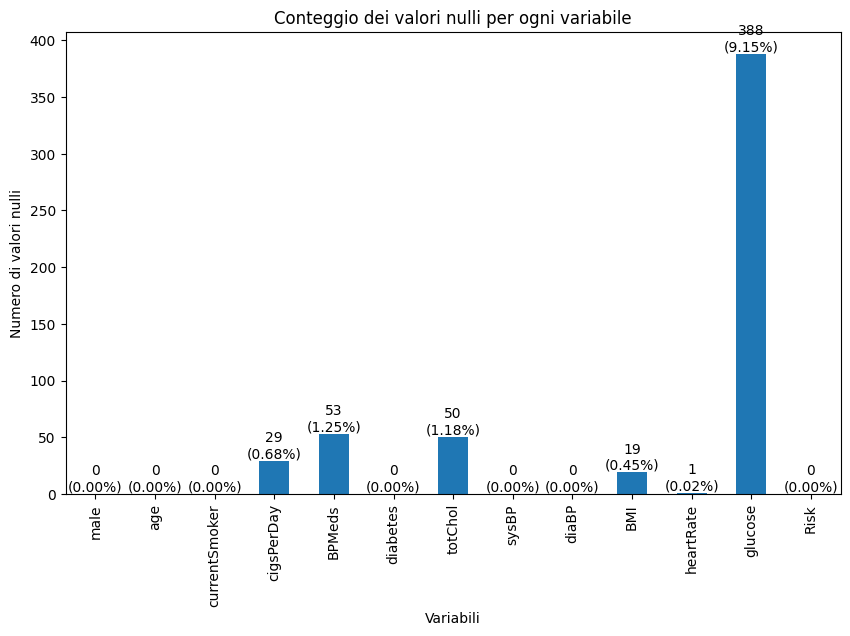


Numero totale di righe prima dell'eliminazione: 4240
Numero totale di righe dopo l'eliminazione delle righe con valori nulli: 3751
Numero totale di colonne dopo l'eliminazione delle righe con valori nulli: 13
Numero totale di righe eliminate: 489
Numero totale di valori nulli rimasti: 0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'


df = pd.read_excel(file_path)

# conto i valori nulli per ogni variabile
null_counts = df.isnull().sum()

# calcolo il totale delle osservazioni per ogni variabile
total_counts = len(df)

# reputo opportuno creare un grafico a barre per visivamente capire quali sono i valori mancanti più frequenti
plt.figure(figsize=(10, 6))
bars = null_counts.plot(kind='bar')

# aggiungo titolo e etichette agli assi
plt.title('Conteggio dei valori nulli per ogni variabile')
plt.xlabel('Variabili')
plt.ylabel('Numero di valori nulli')

# decido di aggiungere numero assoluto e percentuale sopra ogni barra per rendere più intuitivo il rapporto
for bar in bars.patches:
    height = bar.get_height()
    percentage = (height / total_counts) * 100 if total_counts > 0 else 0
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}\n({percentage:.2f}%)', 
        ha='center', 
        va='bottom'
    )

# grafico
plt.show()

# salvo il numero totale di righe prima dell'eliminazione, per avere un raffronto dopo la trasformazione
total_rows_before = df.shape[0]

# elimino le righe con valori nulli
df_cleaned = df.dropna()

# salvo il numero totale di righe e colonne dopo l'eliminazione
total_rows_after = df_cleaned.shape[0]
total_columns_cleaned = df_cleaned.shape[1]

# calcolo il numero di righe eliminate
rows_deleted = total_rows_before - total_rows_after

# verifico, per eccesso di zelo, che non ci siano più righe con valori nulli
null_counts_cleaned = df_cleaned.isnull().sum().sum()

# mostro i risultati
print("\nNumero totale di righe prima dell'eliminazione:", total_rows_before)
print("Numero totale di righe dopo l'eliminazione delle righe con valori nulli:", total_rows_after)
print("Numero totale di colonne dopo l'eliminazione delle righe con valori nulli:", total_columns_cleaned)
print("Numero totale di righe eliminate:", rows_deleted)
print("Numero totale di valori nulli rimasti:", null_counts_cleaned)


## Descriptive statistics

### Data summarization & visualization

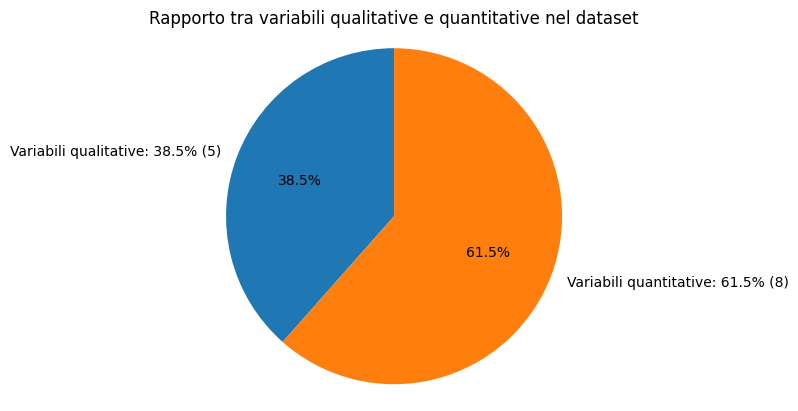

In [4]:
import matplotlib.pyplot as plt

# Dati delle variabili (ottenuti precedentemente)
num_variabili_qualitative = 5  # Numero di variabili qualitative
num_variabili_quantitative = 8  # Numero di variabili quantitative

# Calcolo le percentuali
total_variabili = num_variabili_qualitative + num_variabili_quantitative
percentuali = [
    num_variabili_qualitative / total_variabili * 100,
    num_variabili_quantitative / total_variabili * 100
]

# Etichette per il grafico
labels = [
    f'Variabili qualitative: {percentuali[0]:.1f}% ({num_variabili_qualitative})',
    f'Variabili quantitative: {percentuali[1]:.1f}% ({num_variabili_quantitative})'
]

# Creo grafico a torta
fig, ax = plt.subplots()
ax.pie([num_variabili_qualitative, num_variabili_quantitative], labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio garantisce che il grafico sia circolare

plt.title('Rapporto tra variabili qualitative e quantitative nel dataset')

plt.show()

### Numerical data understanding & visualization

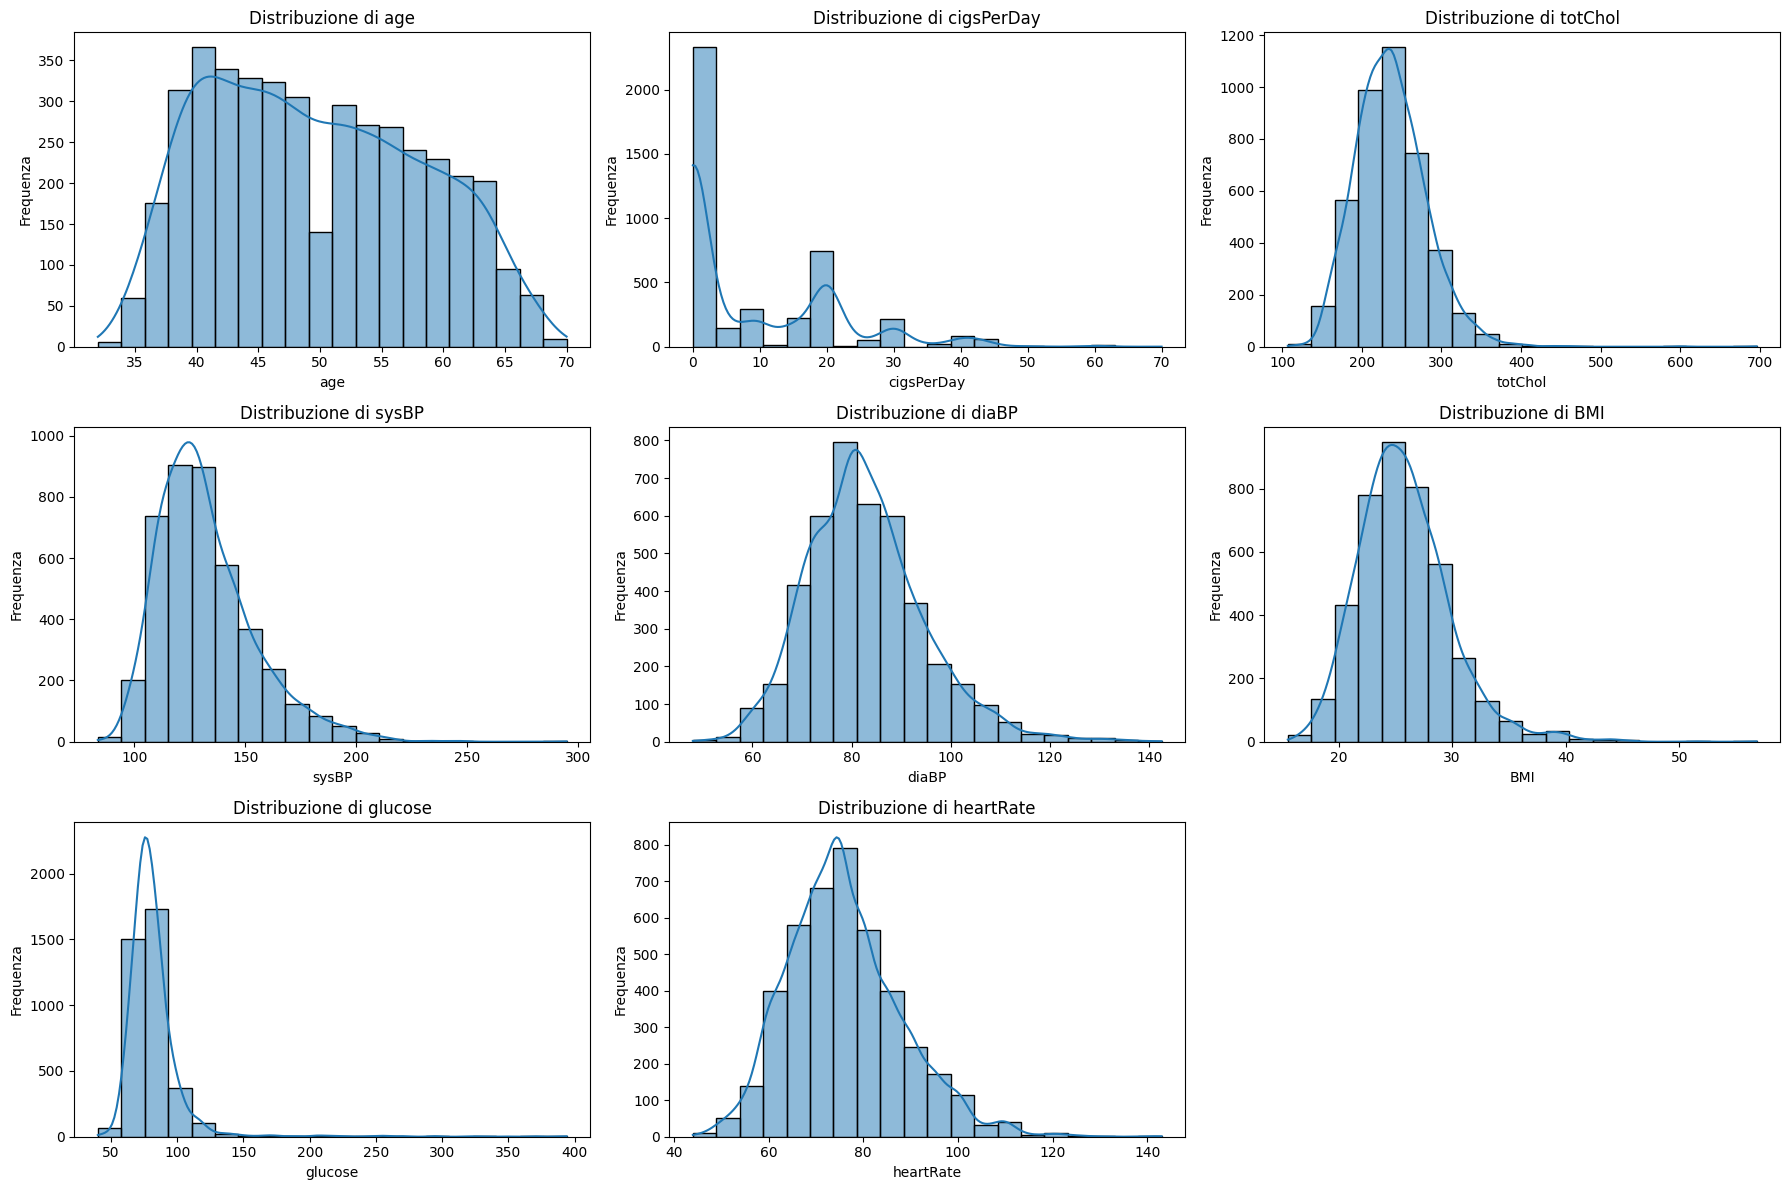

In [9]:
# mi interessa adesso analizzare visivamente le distribuzioni delle variabili numeriche

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

df = pd.read_excel(file_path)

quantitative_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose', 'heartRate']

plt.figure(figsize=(18, 12))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribuzione di {var}')
    plt.xlabel(var)
    plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from scipy.stats import shapiro

# ho dedotto, dando uno sguardo alle rappresentazioni grafiche, che le distribuzioni potrebbero non essere normali
# cerco pertanto conferma tramite il test di Shapiro-Wilk.
# per l'appunto, il p value > 0.05 indica una distribuzione normale, che risulta essenziale per applicare correttamente 
# le analisi statistiche parametriche.


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
data = pd.read_excel(file_path)

quantitative_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

shapiro_results = {}
for var in quantitative_vars:
    stat, p = shapiro(data[var].dropna())
    shapiro_results[var] = (stat, p)

for var, (stat, p) in shapiro_results.items():
    print(f'{var}: Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{var} sembra essere distribuita normalmente (non si rifiuta H0)')
    else:
        print(f'{var} non sembra essere distribuita normalmente (si rifiuta H0)')


age: Statistics=0.967, p=0.000
age non sembra essere distribuita normalmente (si rifiuta H0)
cigsPerDay: Statistics=0.763, p=0.000
cigsPerDay non sembra essere distribuita normalmente (si rifiuta H0)
totChol: Statistics=0.969, p=0.000
totChol non sembra essere distribuita normalmente (si rifiuta H0)
sysBP: Statistics=0.935, p=0.000
sysBP non sembra essere distribuita normalmente (si rifiuta H0)
diaBP: Statistics=0.974, p=0.000
diaBP non sembra essere distribuita normalmente (si rifiuta H0)
BMI: Statistics=0.958, p=0.000
BMI non sembra essere distribuita normalmente (si rifiuta H0)
heartRate: Statistics=0.975, p=0.000
heartRate non sembra essere distribuita normalmente (si rifiuta H0)
glucose: Statistics=0.563, p=0.000
glucose non sembra essere distribuita normalmente (si rifiuta H0)


### Categorical data understanding & visualization

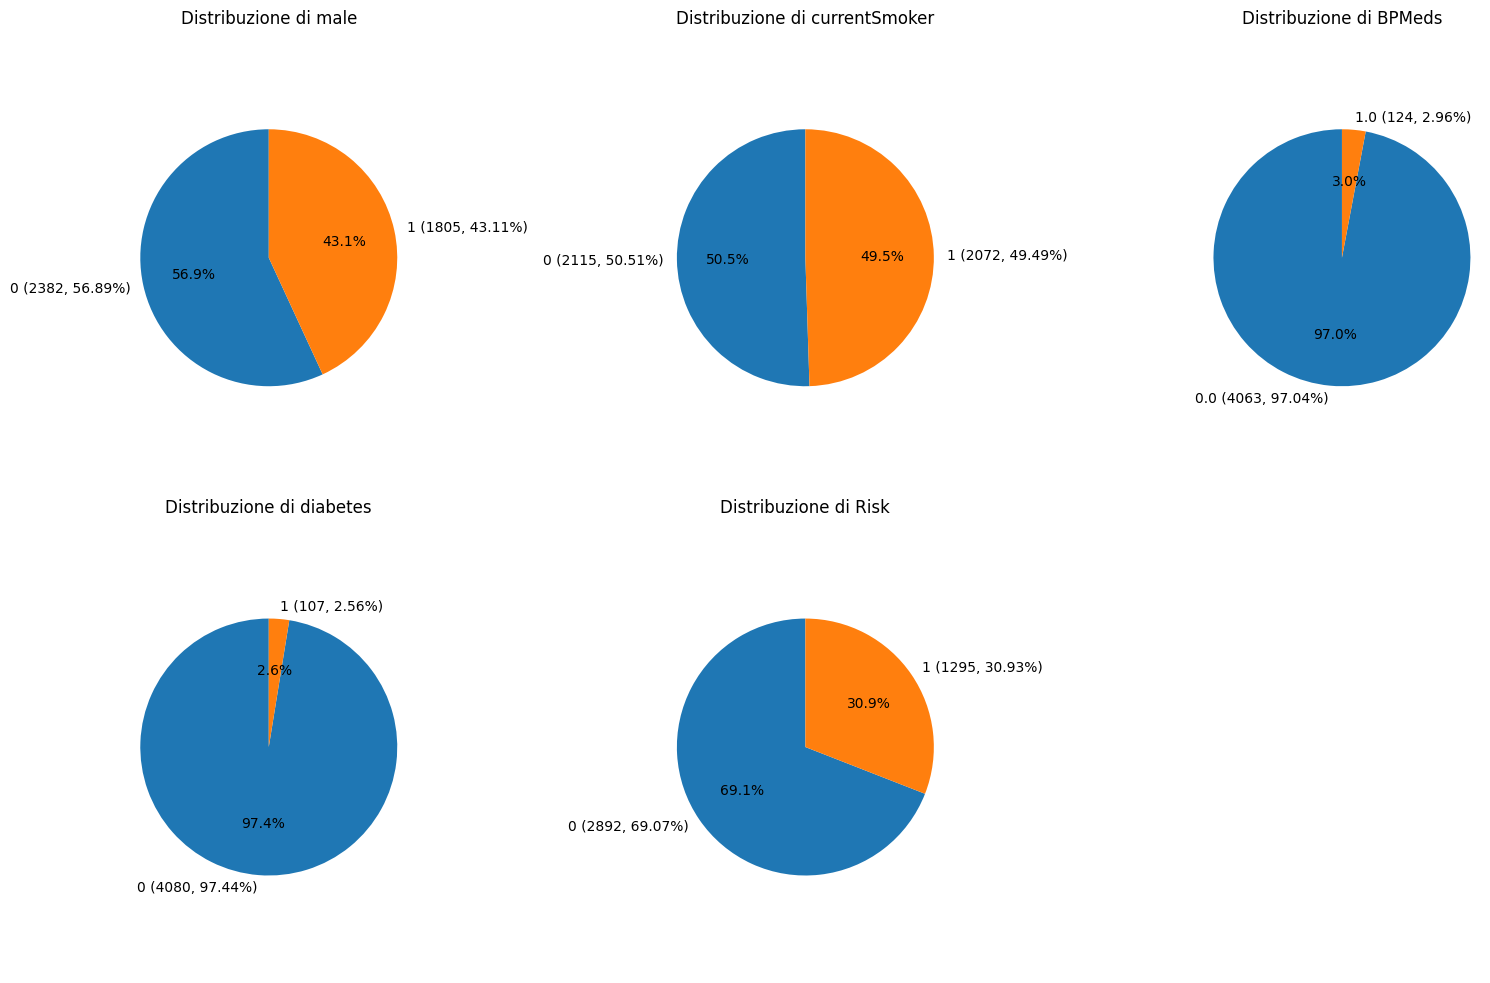

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# mi è interessato poi capire le distribuzioni delle variabili categoriche binarie, per riuscire ad avere uno sguardo d'insieme
# più completo ed esaustivo

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

data = pd.read_excel(file_path)

data = data[data['BPMeds'].isin([0, 1])]

variables = ['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']

results = {}
for var in variables:
    frequencies = data[var].value_counts()
    percentages = frequencies / len(data) * 100
    results[var] = {'frequencies': frequencies, 'percentages': percentages}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, var in enumerate(variables[:5]):  
    frequencies = results[var]['frequencies']
    percentages = results[var]['percentages']

    labels = [f'{label} ({freq}, {percent:.2f}%)' for label, freq, percent in zip(frequencies.index, frequencies, percentages)]
    axs[i].pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Distribuzione di {var}')
    axs[i].axis('equal')

axs[5].axis('off')

plt.tight_layout()
plt.show()


### Cross tabulation

Perché la cross tabulation:

Esplorare le relazioni tra variabili: La cross tabulation mi consente di esplorare in modo rapido e chiaro le relazioni tra diverse variabili categoriche, il che è particolarmente utile per identificare associazioni e pattern che potrebbero non emergere attraverso altre tecniche di analisi.

Valutazione delle distribuzioni congiunte: Attraverso la cross tabulation, posso valutare la distribuzione congiunta delle variabili categoriche, ottenendo informazioni su come sono distribuite le categorie rispetto alle altre variabili.

Preparazione dei dati per modelli predittivi: La cross tabulation rappresenta un passaggio preliminare importante nella fase di preparazione dei dati per modelli predittivi. Mi aiuta a identificare potenziali relazioni predittive tra variabili categoriche che potrei voler includere come feature nei miei modelli di predizione del rischio di ipertensione.

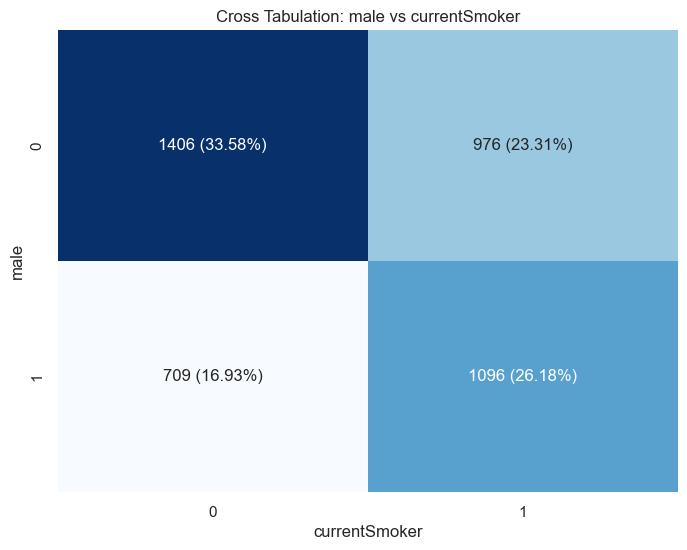

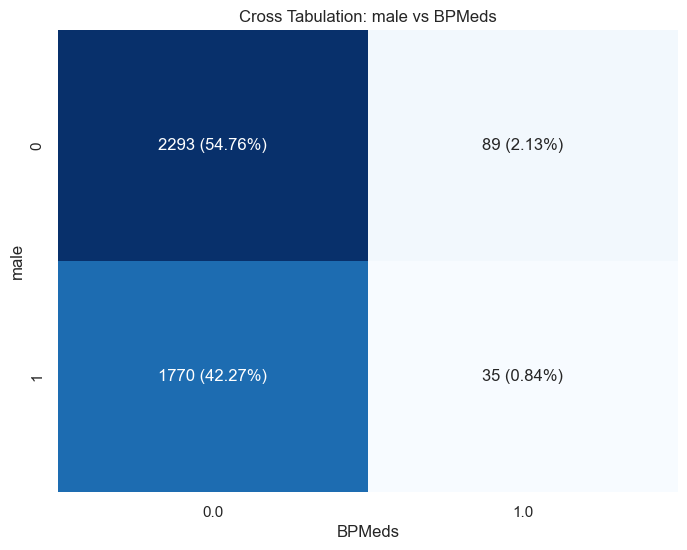

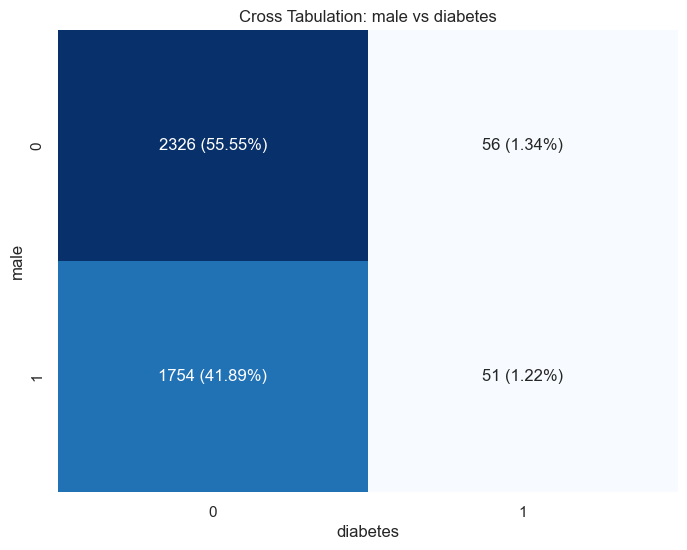

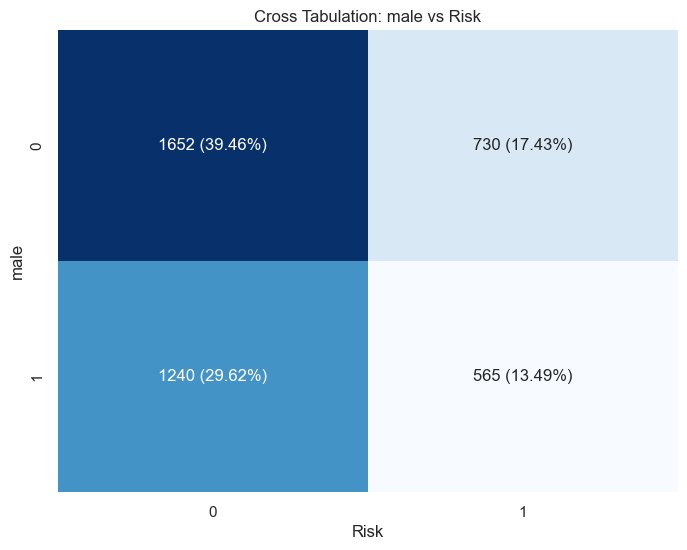

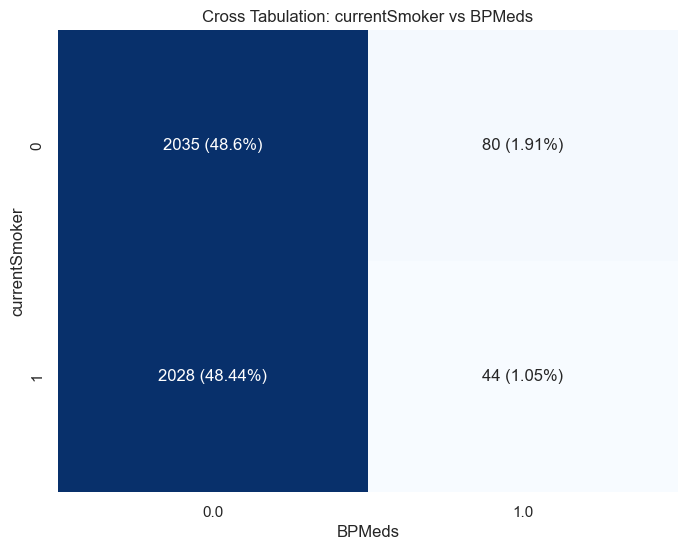

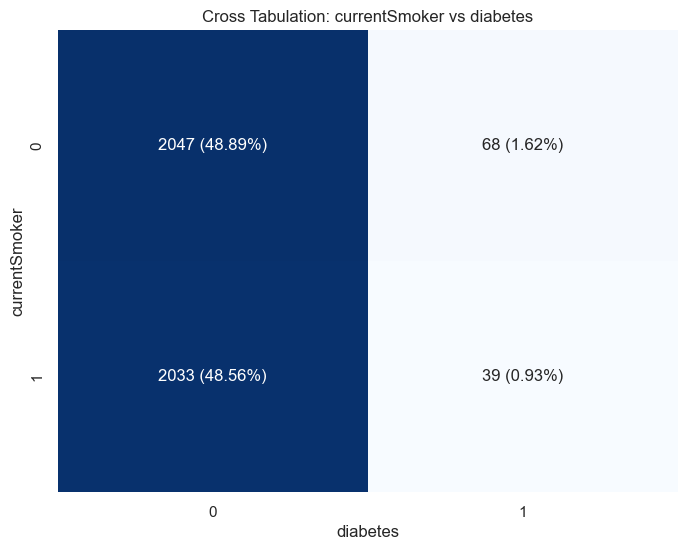

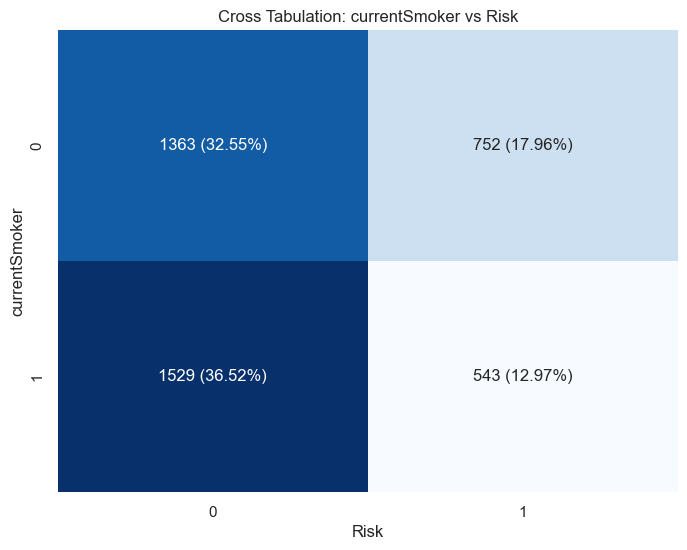

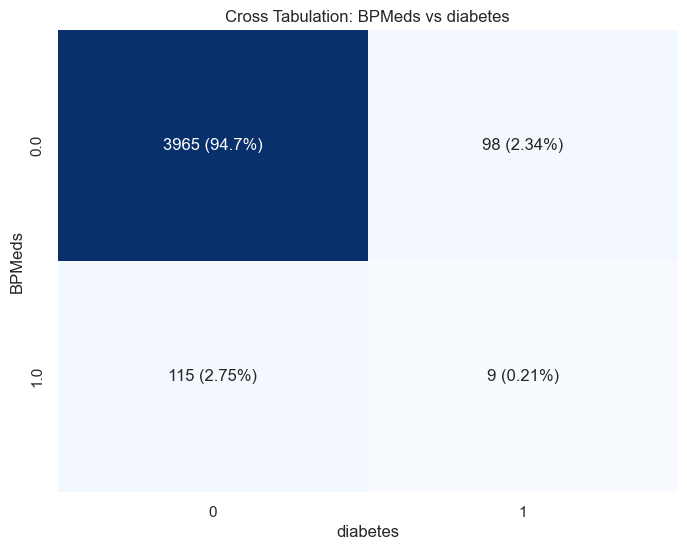

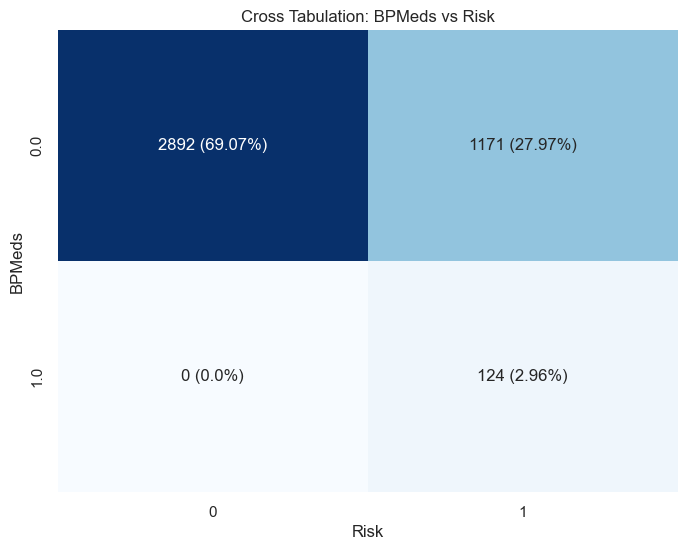

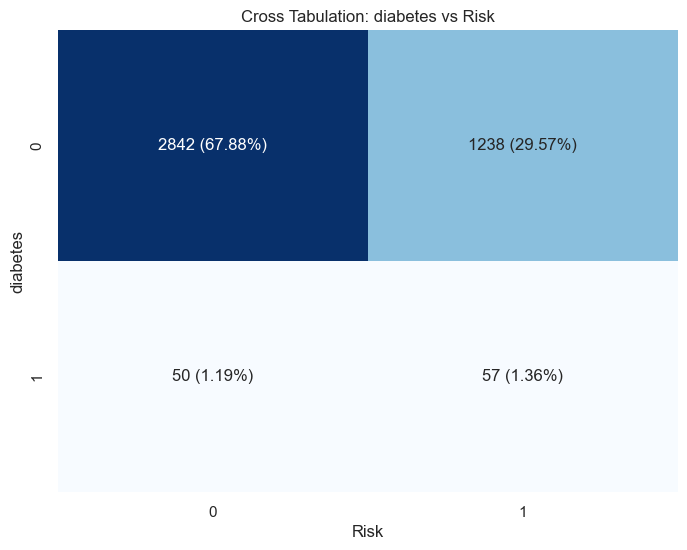

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

data = pd.read_excel(file_path)

data = data[data['BPMeds'].isin([0, 1])]

variables = ['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']

# Creo le tabelle incrociate (cross tabulation) tra le variabili specificate e genero heatmaps per visualizzare le relazioni
def create_cross_tabs_and_plot_heatmaps(variables):
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i < j:
                cross_tab = pd.crosstab(data[var1], data[var2]) # # Calcolo le percentuali rispetto al totale e le aggiungo come annotazioni alla heatmap
                total = cross_tab.sum().sum()

                percentages = (cross_tab / total * 100).round(2).astype(str) + '%'
                cross_tab_with_perc = cross_tab.astype(str) + ' (' + percentages + ')'

                plt.figure(figsize=(8, 6))
                sns.heatmap(cross_tab, annot=cross_tab_with_perc, fmt='', cmap='Blues', cbar=False)
                plt.title(f'Cross Tabulation: {var1} vs {var2}')
                plt.show()

create_cross_tabs_and_plot_heatmaps(variables)


C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1526869039.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1526869039.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1526869039.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipy

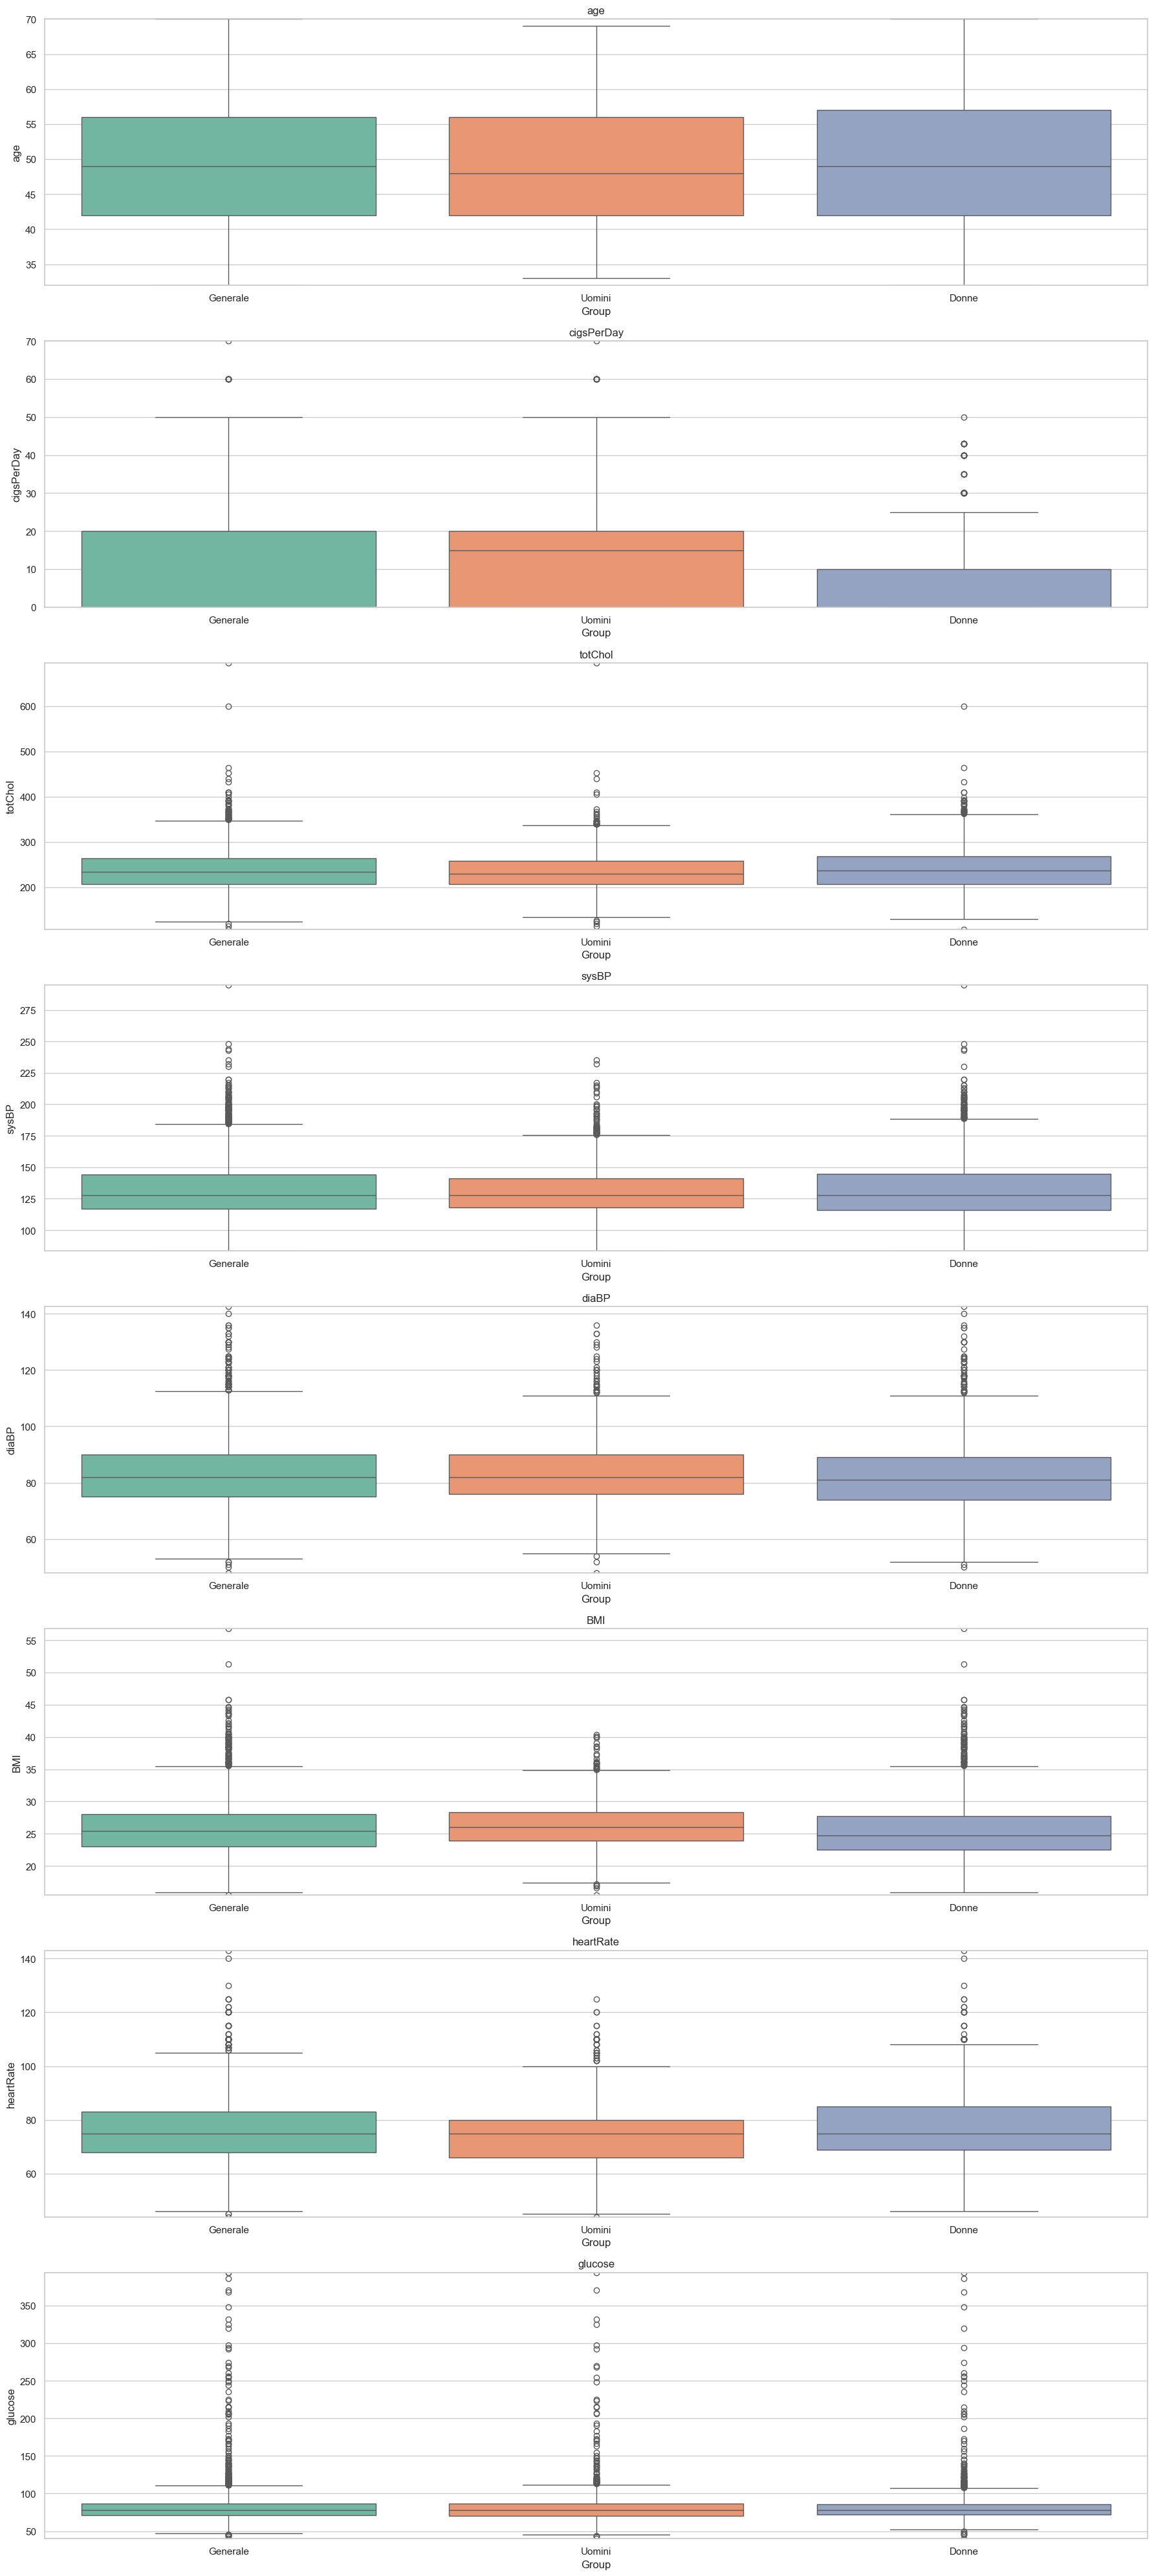

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

df = pd.read_excel(file_path)

# mi interessava poi capire le distribuzioni delle variabili quantitative al variare delle condizioni delle popolazioni osservate
# e quindi, a seconda del sesso, del se avessero diabete o meno, se fossero fumatori, e via discorrendo

exclude_columns = ['Unnamed: 0', 'Risk', 'diabetes', 'currentSmoker', 'BPMeds', 'male']
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

df_uomini = df[df['male'] == 1][numeric_columns]
df_donne = df[df['male'] == 0][numeric_columns]
df_generale = df[numeric_columns]

# creo quindi una serie di boxplot, che aiutano ad identificare rapidamente asimmetrie nelle distribuzioni e presenza di outlier, e che
# sintetizzano la forma, la variabilità e la posizione centrale della distribuzione dei dati

def plot_boxplots_side_by_side(df_general, df_men, df_women, columns):
    plt.figure(figsize=(18, 5 * len(columns)))
    
    for idx, column in enumerate(columns):
        combined_df = pd.concat([
            pd.DataFrame({'Group': ['Generale'] * len(df_general), 'Value': df_general[column]}),
            pd.DataFrame({'Group': ['Uomini'] * len(df_men), 'Value': df_men[column]}),
            pd.DataFrame({'Group': ['Donne'] * len(df_women), 'Value': df_women[column]})
        ], ignore_index=True)  # Ignora gli indici per evitare duplicati
        
        min_val = combined_df['Value'].min()
        max_val = combined_df['Value'].max()

        plt.subplot(len(columns), 1, idx + 1)
        sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
        plt.title(f'{column}')
        plt.ylim(min_val, max_val)
        plt.ylabel(column)
        
    plt.tight_layout()
    plt.show()

plot_boxplots_side_by_side(df_generale, df_uomini, df_donne, numeric_columns)


C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2505415700.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2505415700.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2505415700.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipy

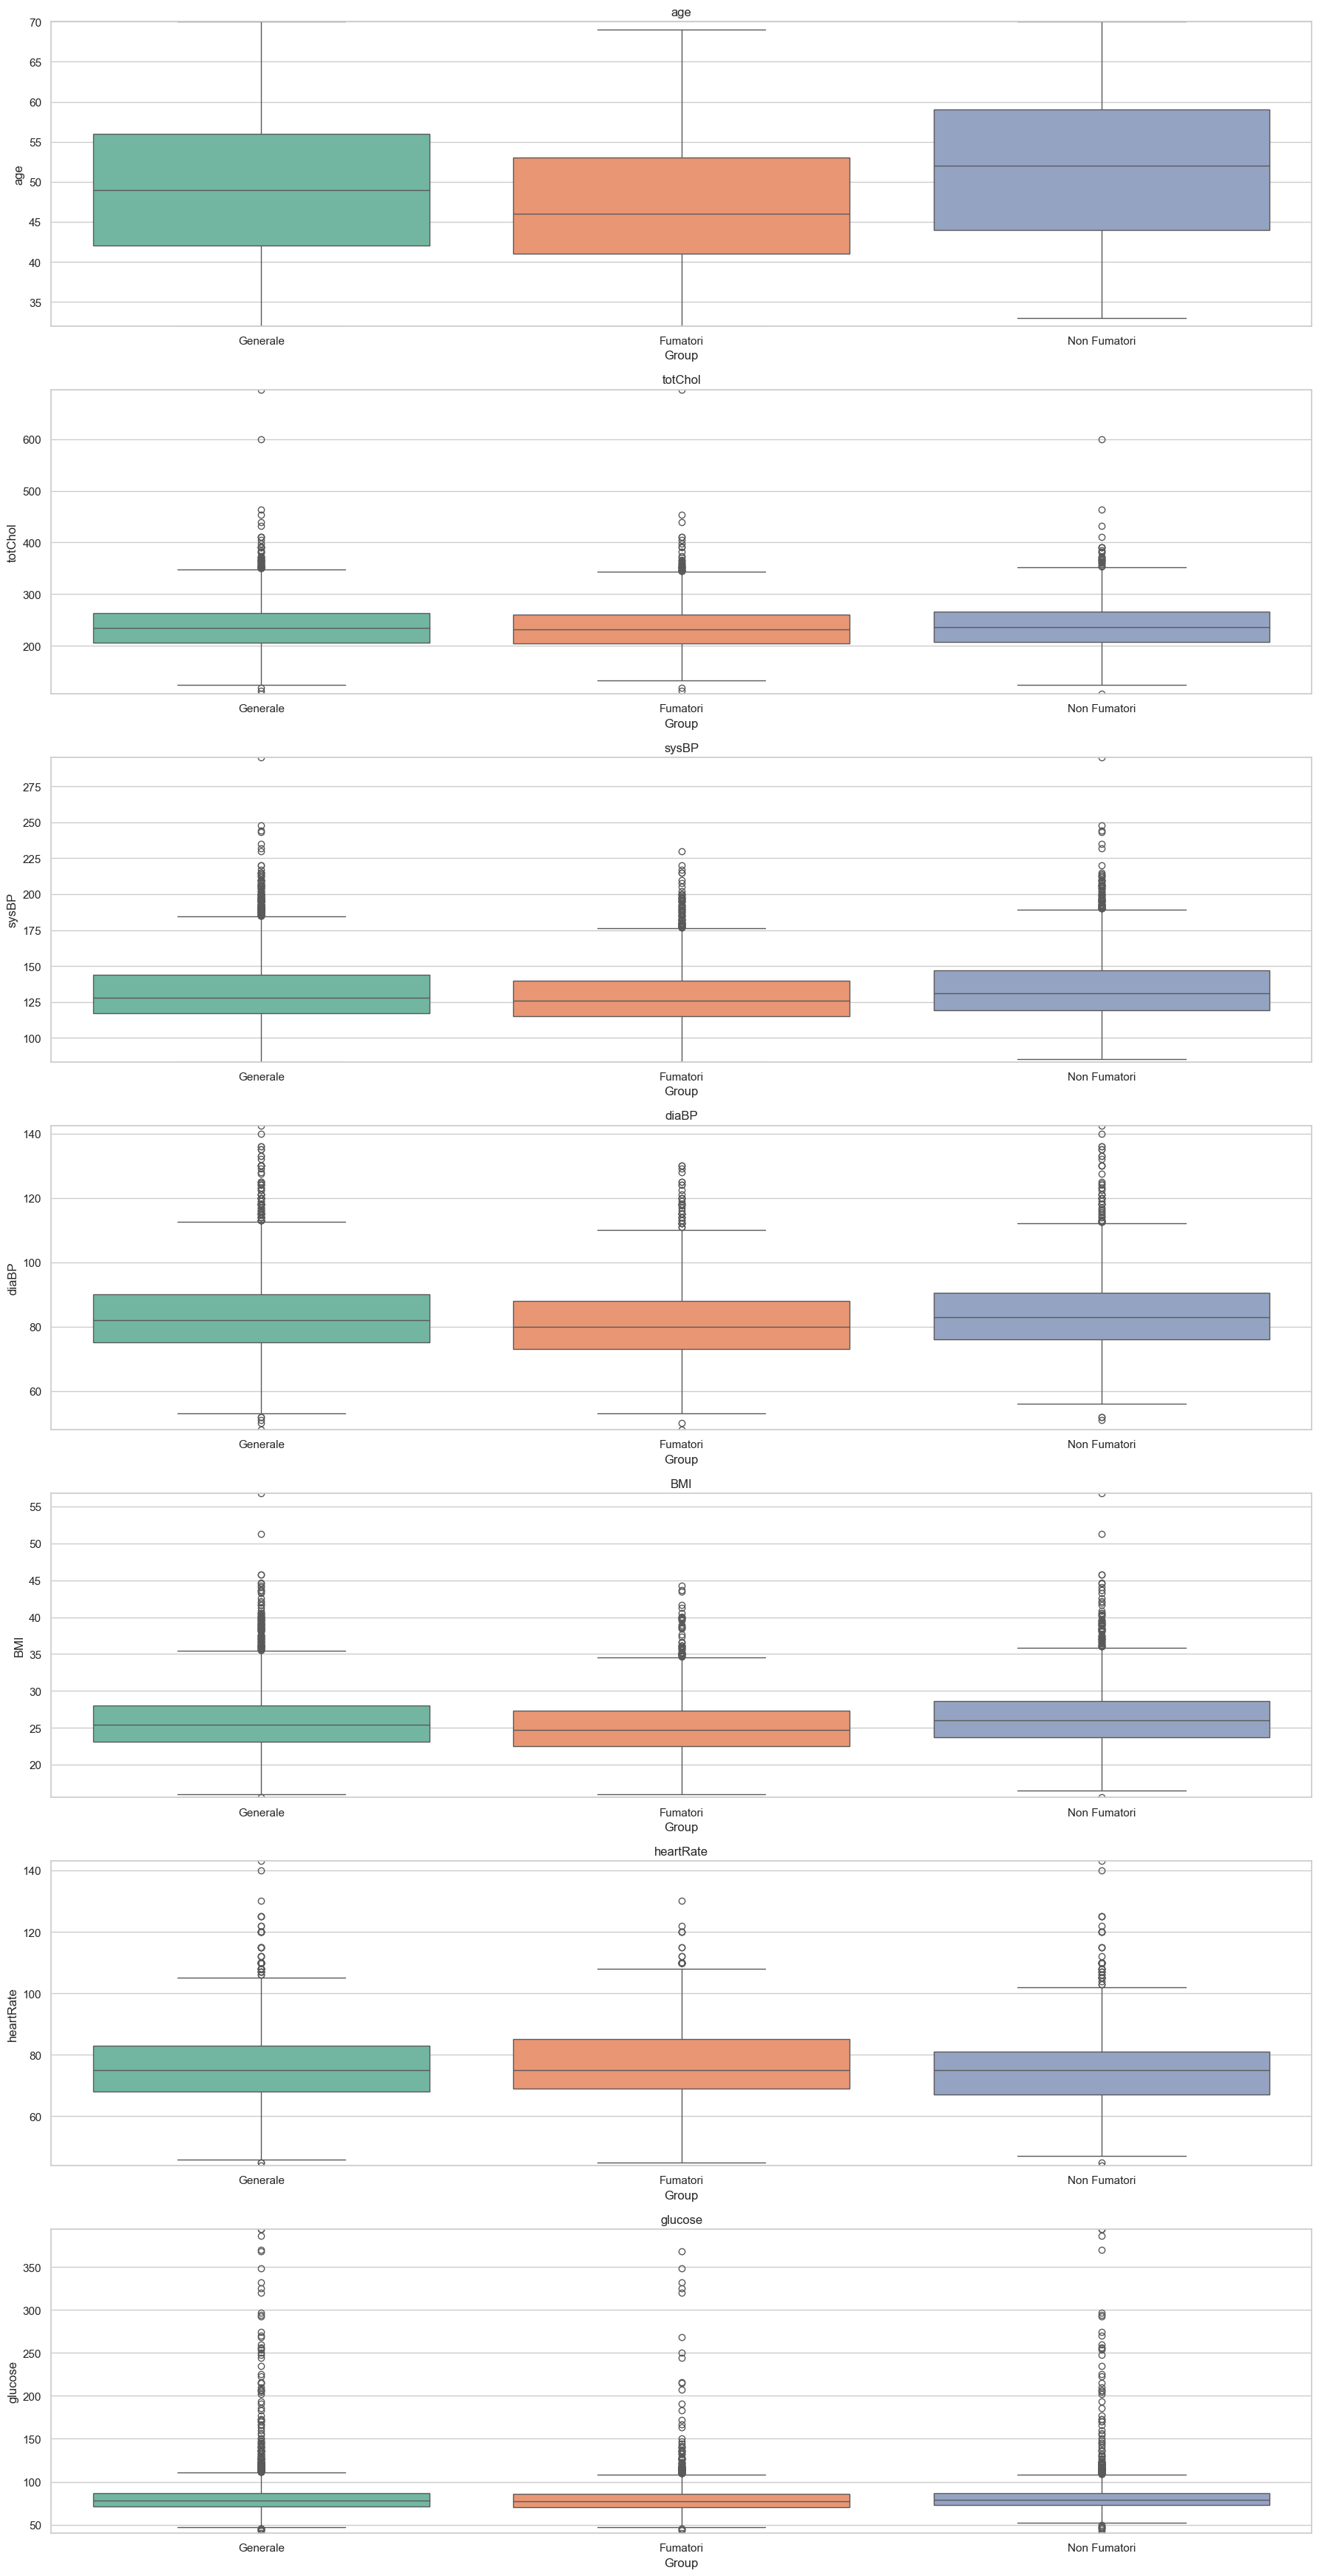

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
data = pd.read_excel(file_path)

sns.set(style="whitegrid")

exclude_columns = ['Unnamed: 0', 'Risk', 'diabetes', 'currentSmoker', 'BPMeds', 'male', 'cigsPerDay']
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

df_smokers = data[data['currentSmoker'] == 1][numeric_columns]
df_non_smokers = data[data['currentSmoker'] == 0][numeric_columns]
df_generale = data[numeric_columns]

def plot_boxplots_side_by_side(df_general, df_smokers, df_non_smokers, columns):
    plt.figure(figsize=(18, 5 * len(columns)))
    
    for idx, column in enumerate(columns):
        combined_df = pd.concat([
            pd.DataFrame({'Group': ['Generale'] * len(df_general), 'Value': df_general[column]}),
            pd.DataFrame({'Group': ['Fumatori'] * len(df_smokers), 'Value': df_smokers[column]}),
            pd.DataFrame({'Group': ['Non Fumatori'] * len(df_non_smokers), 'Value': df_non_smokers[column]})
        ], ignore_index=True)  
        
        min_val = combined_df['Value'].min()
        max_val = combined_df['Value'].max()

        plt.subplot(len(columns), 1, idx + 1)
        sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
        plt.title(f'{column}')
        plt.ylim(min_val, max_val)
        plt.ylabel(column)
        
    plt.tight_layout()
    plt.show()

plot_boxplots_side_by_side(df_generale, df_smokers, df_non_smokers, numeric_columns)


C:\Users\frast\AppData\Local\Temp\ipykernel_24332\826082824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\826082824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\826082824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipyker

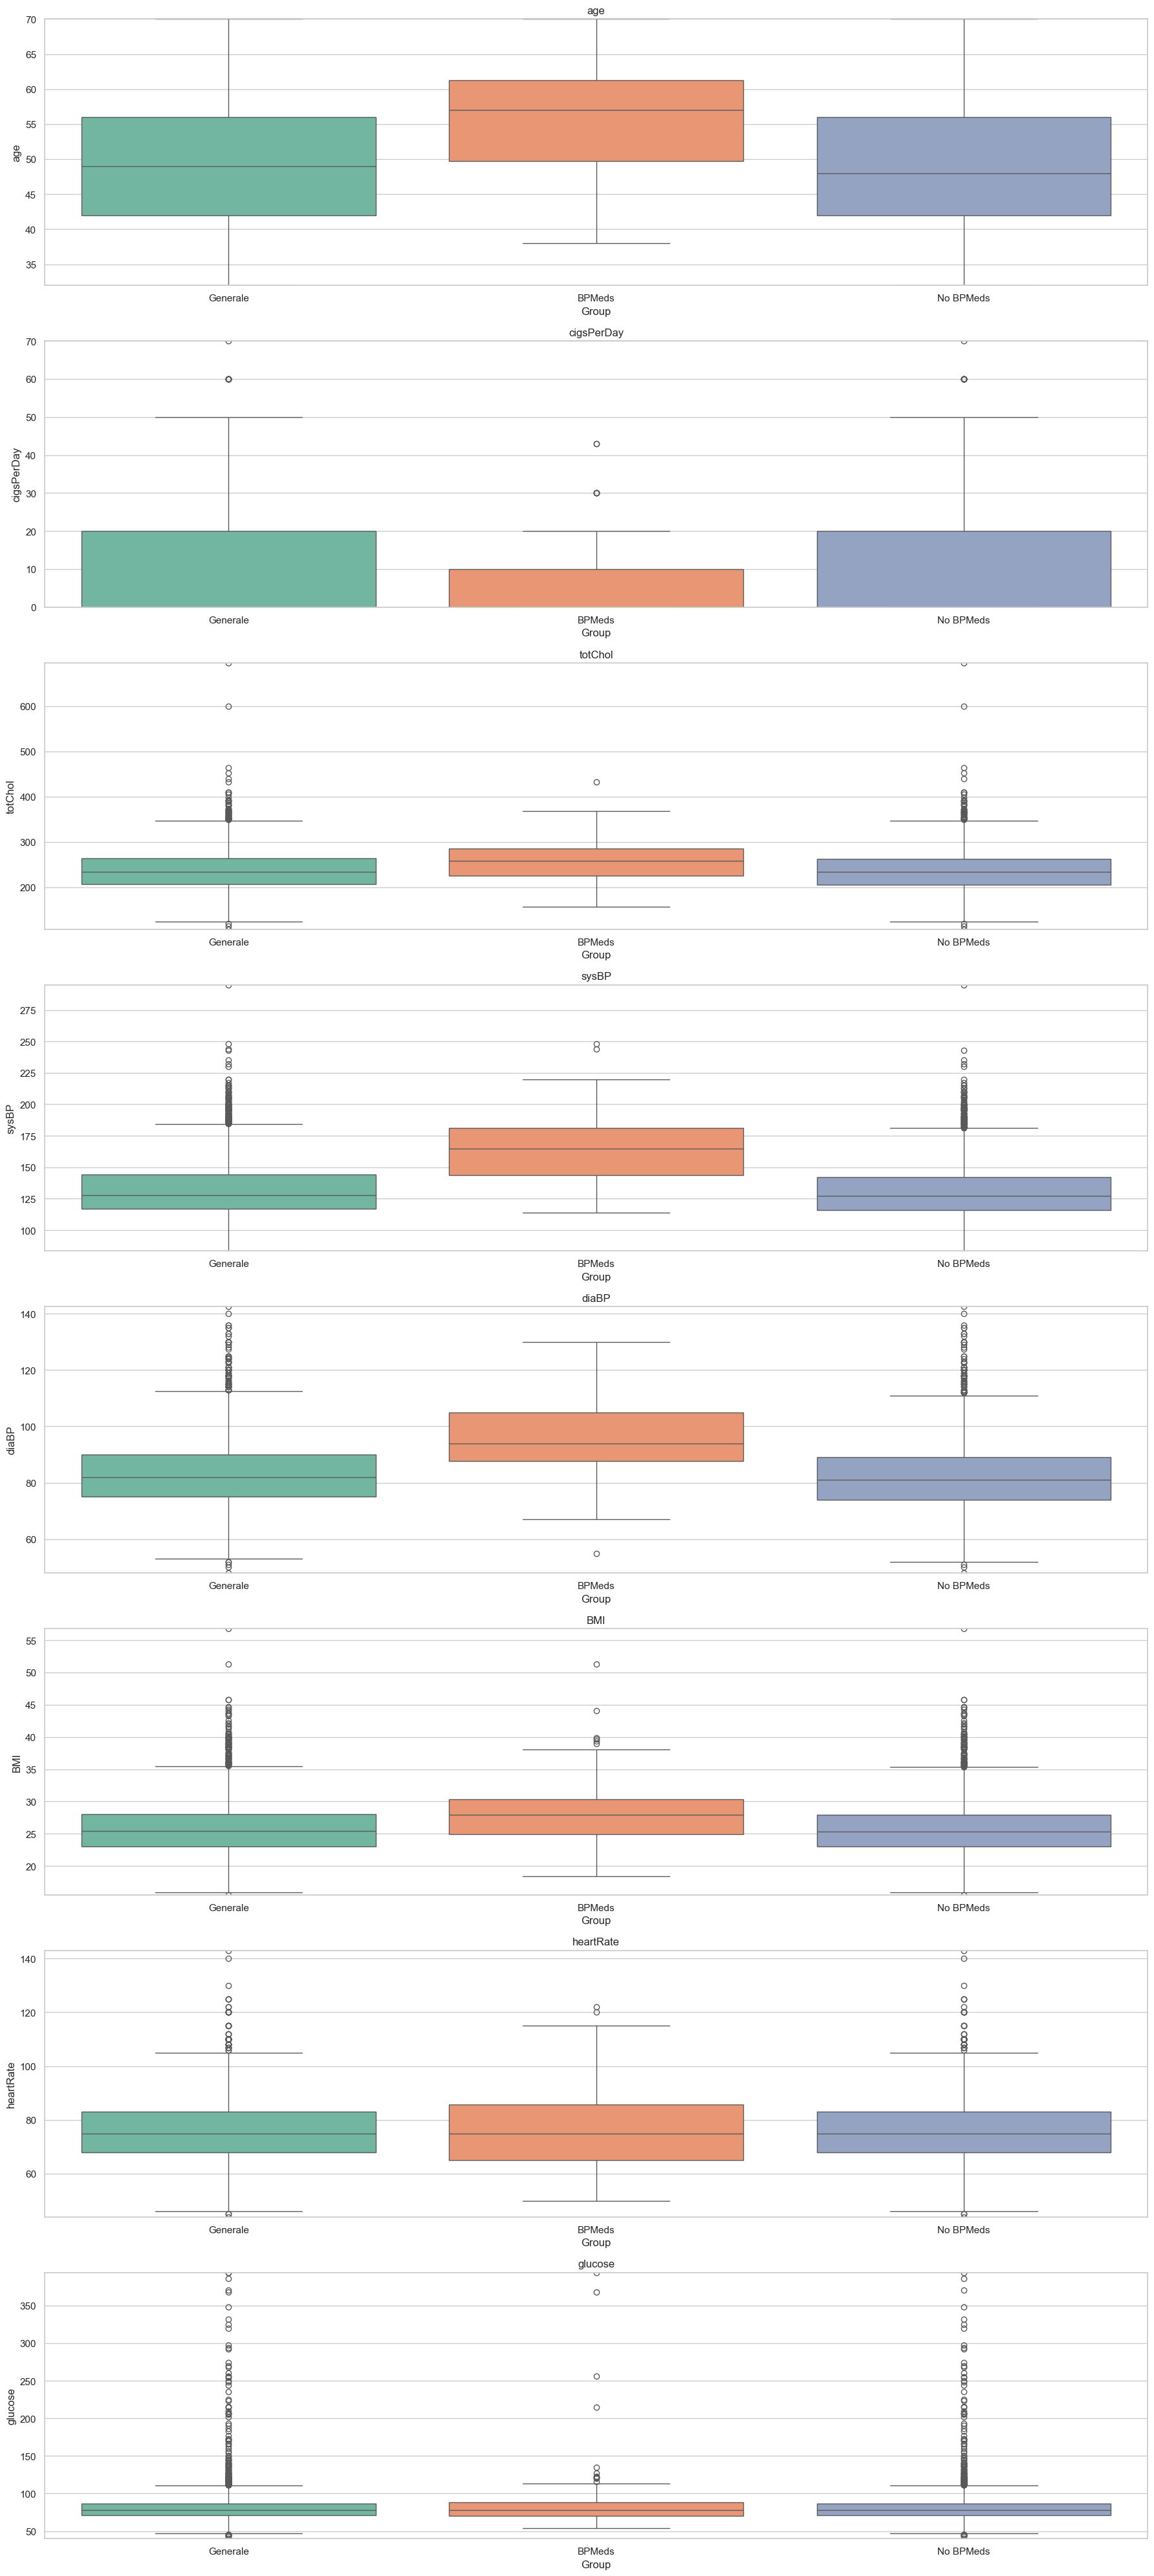

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
data = pd.read_excel(file_path)

sns.set(style="whitegrid")

exclude_columns = ['Unnamed: 0', 'Risk', 'diabetes', 'BPMeds', 'currentSmoker', 'male']
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

df_bpmeds = data[data['BPMeds'] == 1][numeric_columns]
df_no_bpmeds = data[data['BPMeds'] == 0][numeric_columns]
df_generale = data[numeric_columns]

def plot_boxplots_side_by_side(df_general, df_bpmeds, df_no_bpmeds, columns):
    plt.figure(figsize=(18, 5 * len(columns)))
    
    for idx, column in enumerate(columns):
        combined_df = pd.concat([
            pd.DataFrame({'Group': ['Generale'] * len(df_general), 'Value': df_general[column]}),
            pd.DataFrame({'Group': ['BPMeds'] * len(df_bpmeds), 'Value': df_bpmeds[column]}),
            pd.DataFrame({'Group': ['No BPMeds'] * len(df_no_bpmeds), 'Value': df_no_bpmeds[column]})
        ], ignore_index=True)
        
        min_val = combined_df['Value'].min()
        max_val = combined_df['Value'].max()

        plt.subplot(len(columns), 1, idx + 1)
        sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
        plt.title(f'{column}')
        plt.ylim(min_val, max_val)
        plt.ylabel(column)
        
    plt.tight_layout()
    plt.show()

plot_boxplots_side_by_side(df_generale, df_bpmeds, df_no_bpmeds, numeric_columns)


C:\Users\frast\AppData\Local\Temp\ipykernel_24332\4012942510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\4012942510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\4012942510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipy

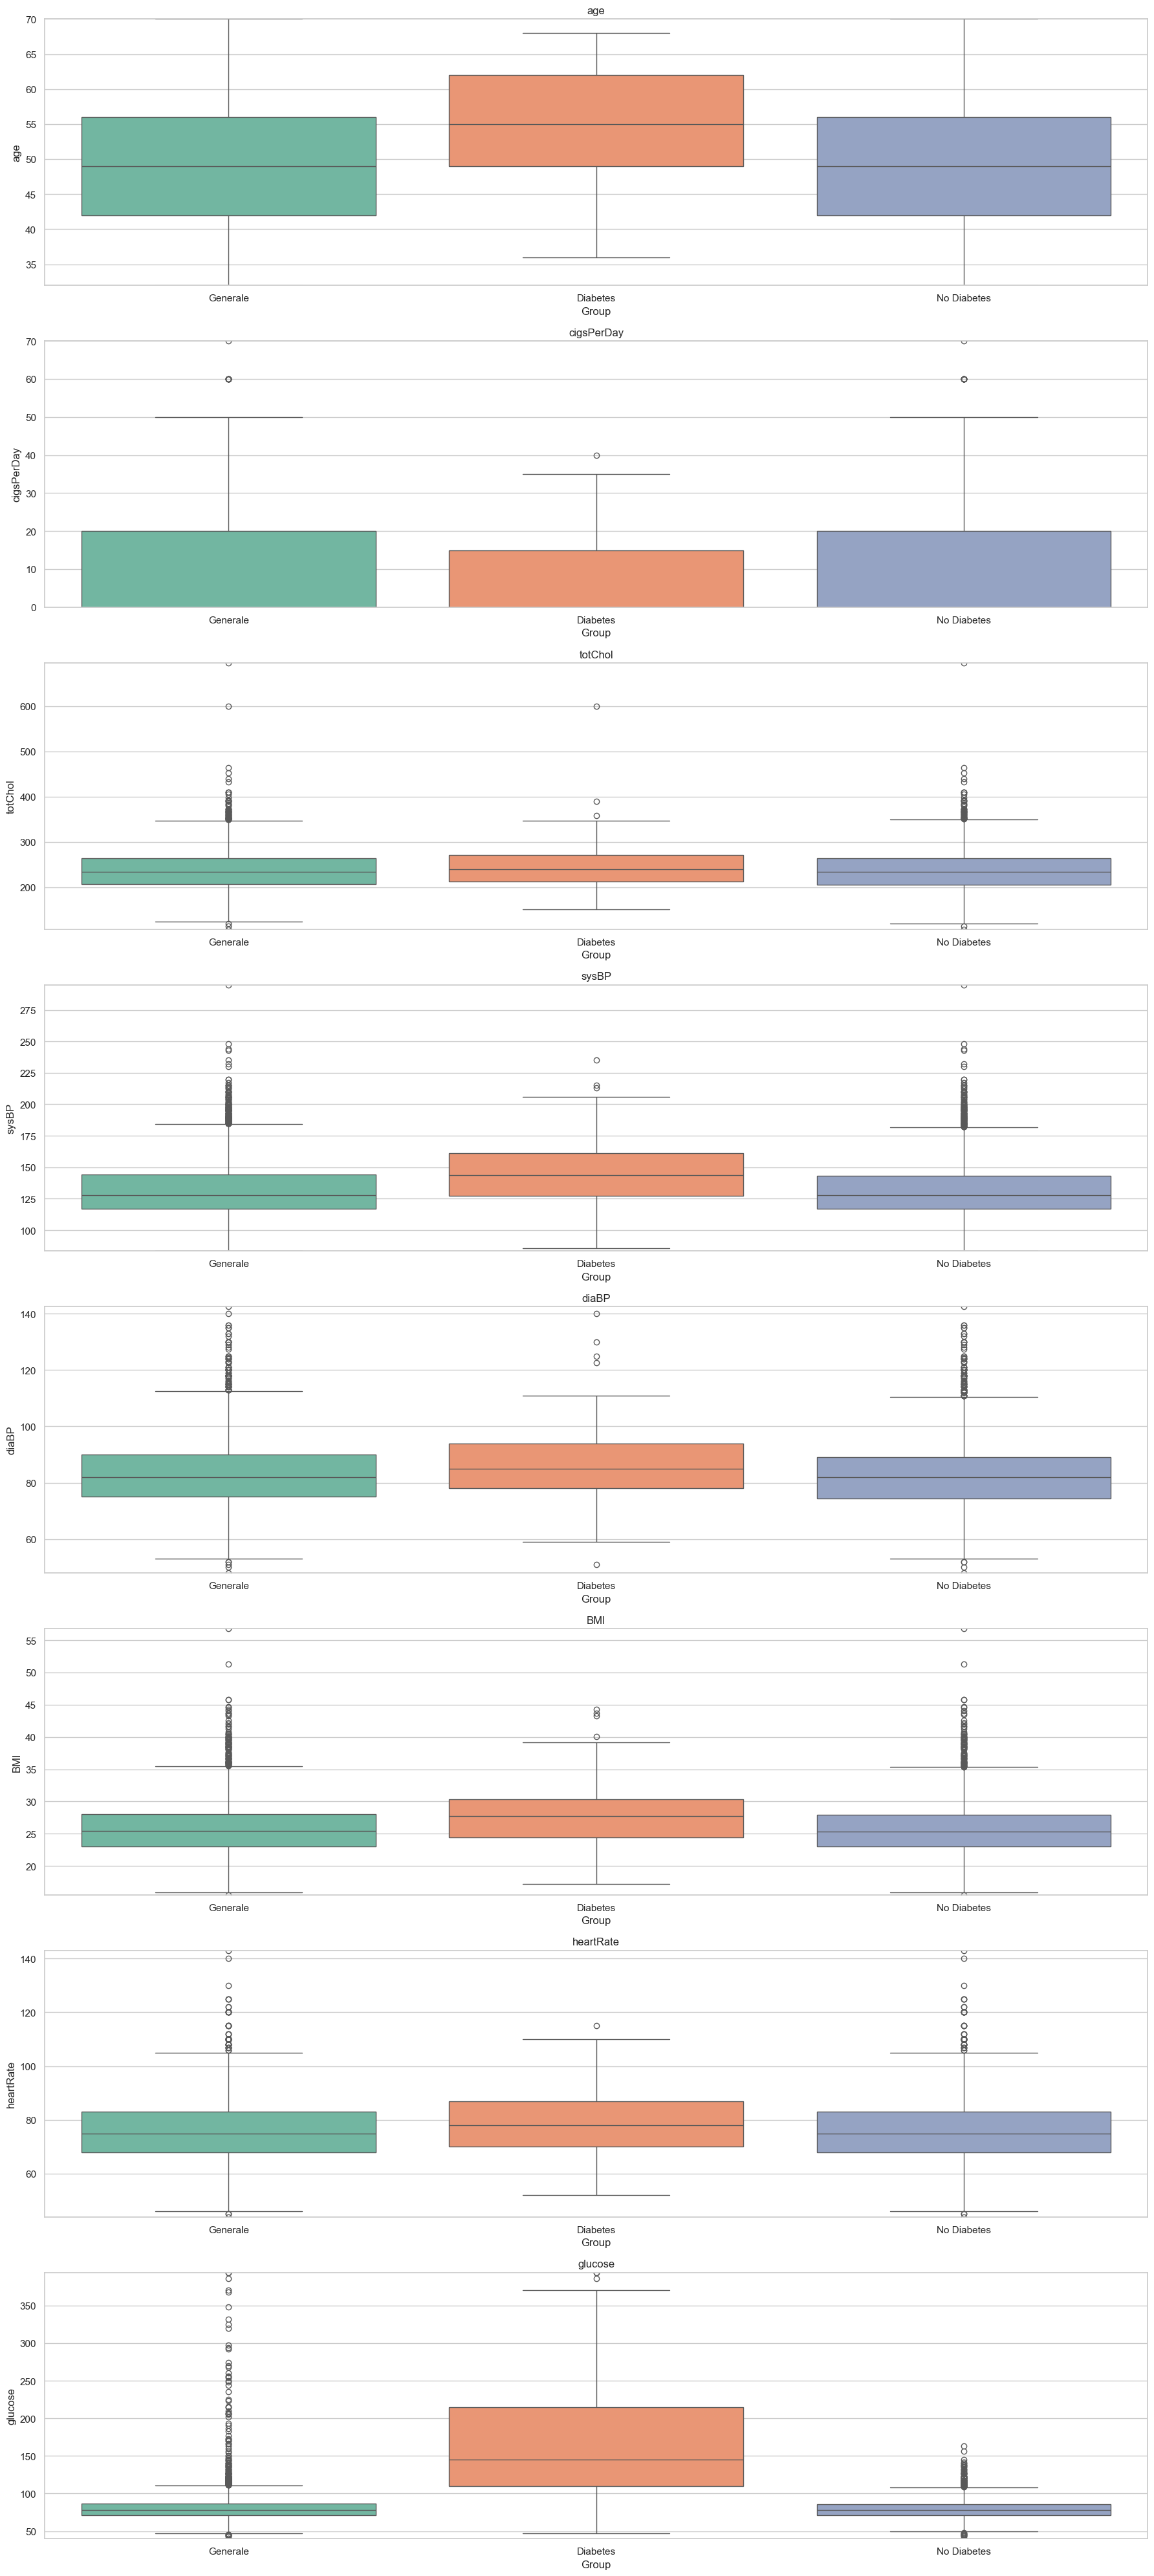

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
data = pd.read_excel(file_path)

sns.set(style="whitegrid")

exclude_columns = ['Unnamed: 0', 'Risk', 'BPMeds', 'currentSmoker', 'male', 'diabetes']
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

df_diabetes = data[data['diabetes'] == 1][numeric_columns]
df_no_diabetes = data[data['diabetes'] == 0][numeric_columns]
df_generale = data[numeric_columns]

def plot_boxplots_side_by_side(df_general, df_diabetes, df_no_diabetes, columns):
    plt.figure(figsize=(18, 5 * len(columns)))
    
    for idx, column in enumerate(columns):
        combined_df = pd.concat([
            pd.DataFrame({'Group': ['Generale'] * len(df_general), 'Value': df_general[column]}),
            pd.DataFrame({'Group': ['Diabetes'] * len(df_diabetes), 'Value': df_diabetes[column]}),
            pd.DataFrame({'Group': ['No Diabetes'] * len(df_no_diabetes), 'Value': df_no_diabetes[column]})
        ], ignore_index=True)
        
        min_val = combined_df['Value'].min()
        max_val = combined_df['Value'].max()

        plt.subplot(len(columns), 1, idx + 1)
        sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
        plt.title(f'{column}')
        plt.ylim(min_val, max_val)
        plt.ylabel(column)
        
    plt.tight_layout()
    plt.show()

plot_boxplots_side_by_side(df_generale, df_diabetes, df_no_diabetes, numeric_columns)


C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2925155144.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2925155144.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipykernel_24332\2925155144.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
C:\Users\frast\AppData\Local\Temp\ipy

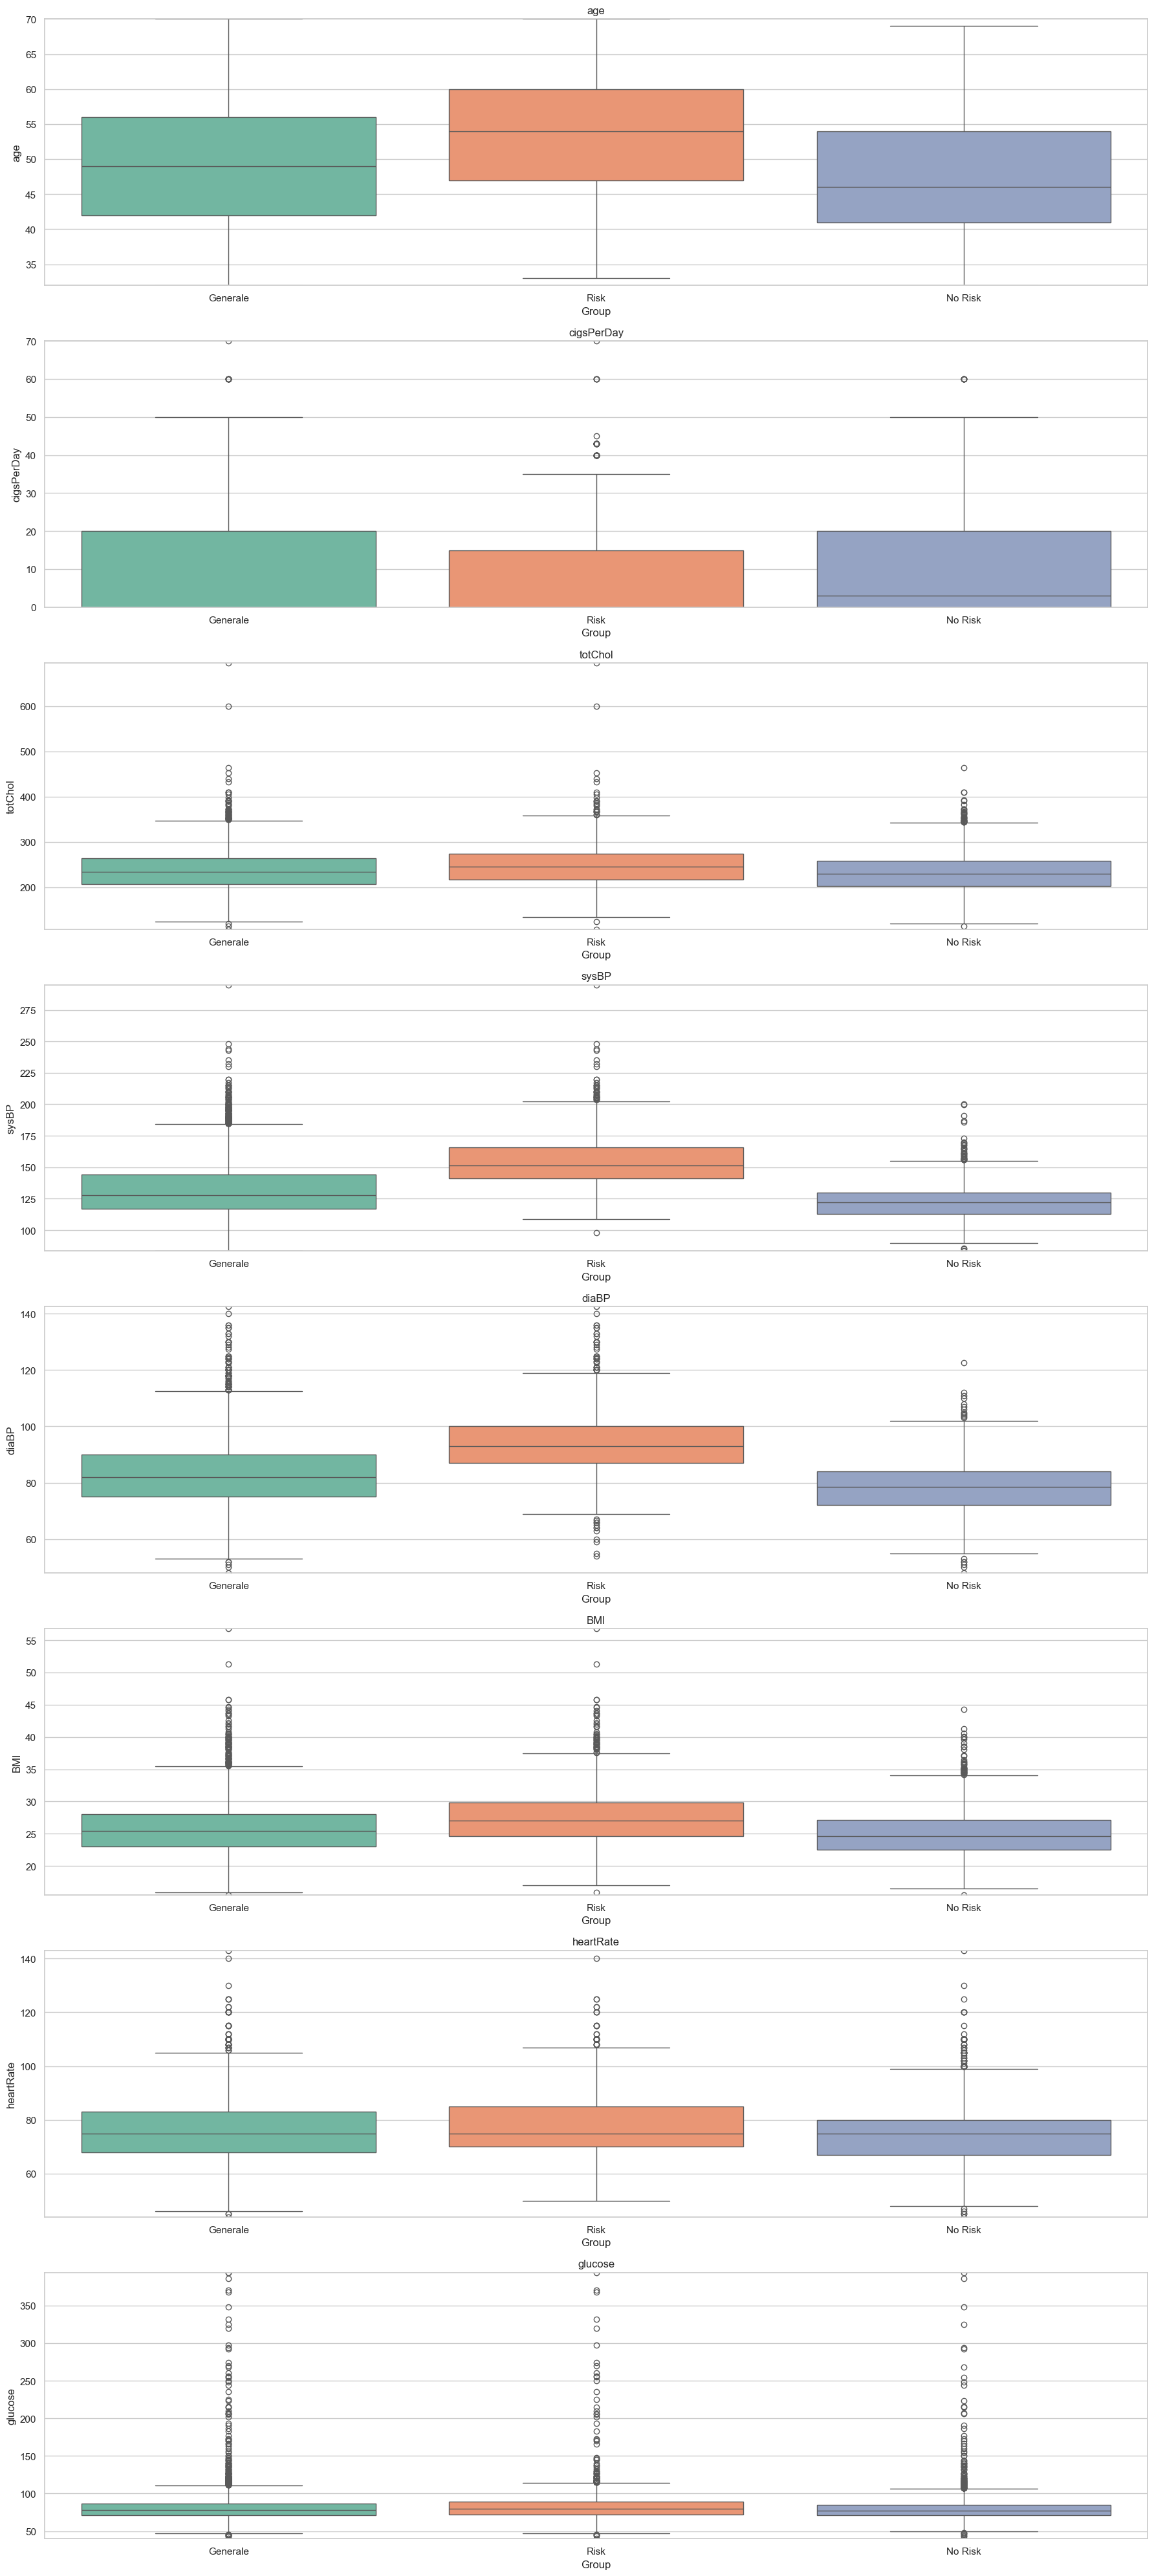

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'
data = pd.read_excel(file_path)

sns.set(style="whitegrid")

exclude_columns = ['Unnamed: 0', 'diabetes', 'BPMeds', 'currentSmoker', 'male', 'Risk']
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

df_risk = data[data['Risk'] == 1][numeric_columns]
df_no_risk = data[data['Risk'] == 0][numeric_columns]
df_generale = data[numeric_columns]

def plot_boxplots_side_by_side(df_general, df_risk, df_no_risk, columns):
    plt.figure(figsize=(18, 5 * len(columns)))
    
    for idx, column in enumerate(columns):
        combined_df = pd.concat([
            pd.DataFrame({'Group': ['Generale'] * len(df_general), 'Value': df_general[column]}),
            pd.DataFrame({'Group': ['Risk'] * len(df_risk), 'Value': df_risk[column]}),
            pd.DataFrame({'Group': ['No Risk'] * len(df_no_risk), 'Value': df_no_risk[column]})
        ], ignore_index=True)
        
        min_val = combined_df['Value'].min()
        max_val = combined_df['Value'].max()

        plt.subplot(len(columns), 1, idx + 1)
        sns.boxplot(x='Group', y='Value', data=combined_df, palette='Set2')
        plt.title(f'{column}')
        plt.ylim(min_val, max_val)
        plt.ylabel(column)
        
    plt.tight_layout()
    plt.show()

plot_boxplots_side_by_side(df_generale, df_risk, df_no_risk, numeric_columns)


## Multidimensional data analysis

### Mann-Whitney test & visualization

In [88]:
# intuendo che i dati non sono distribuiti normalmente, ritengo opportuno eseguire il test di Mann-Whitney
# per avere conforto della mia tesi. Questo test è non parametrico, indicato proprio per dati non distribuiti in condizione normale

import pandas as pd
from scipy.stats import mannwhitneyu


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

data = pd.read_excel(file_path)

quantitative_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

results = []

# eseguo il test di Mann-Whitney per tutte le coppie di variabili
for i in range(len(quantitative_vars)):
    for j in range(i + 1, len(quantitative_vars)):
        var1 = quantitative_vars[i]
        var2 = quantitative_vars[j]
        
        # rimuovo eventuali NaN dai dati
        data_var1 = data[var1].dropna()
        data_var2 = data[var2].dropna()
        
        # Verifica che ci siano abbastanza dati per eseguire il test
        if len(data_var1) > 0 and len(data_var2) > 0:
            stat, p = mannwhitneyu(data_var1, data_var2)
            results.append((var1, var2, stat, p))
        else:
            results.append((var1, var2, float('nan'), float('nan')))

results_df = pd.DataFrame(results, columns=['Var1', 'Var2', 'Statistic', 'P-Value'])

print(results_df)

          Var1        Var2   Statistic        P-Value
0          age  cigsPerDay  17672866.5   0.000000e+00
1          age     totChol         0.0   0.000000e+00
2          age       sysBP         0.0   0.000000e+00
3          age       diaBP    106392.0   0.000000e+00
4          age         BMI  17841424.5   0.000000e+00
5          age   heartRate    527029.0   0.000000e+00
6          age     glucose    252155.5   0.000000e+00
7   cigsPerDay     totChol         0.0   0.000000e+00
8   cigsPerDay       sysBP         0.0   0.000000e+00
9   cigsPerDay       diaBP      1106.5   0.000000e+00
10  cigsPerDay         BMI   1824306.5   0.000000e+00
11  cigsPerDay   heartRate      5050.0   0.000000e+00
12  cigsPerDay     glucose      2574.5   0.000000e+00
13     totChol       sysBP  17544861.0   0.000000e+00
14     totChol       diaBP  17765259.0   0.000000e+00
15     totChol         BMI  17685990.0   0.000000e+00
16     totChol   heartRate  17761281.5   0.000000e+00
17     totChol     glucose  

C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1789022526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data_quantitative[var], palette='viridis', inner='quartile')
C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1789022526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data_quantitative[var], palette='viridis', inner='quartile')
C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1789022526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data_quantitative[var], palette='viridis', inner='quartile')
C:\User

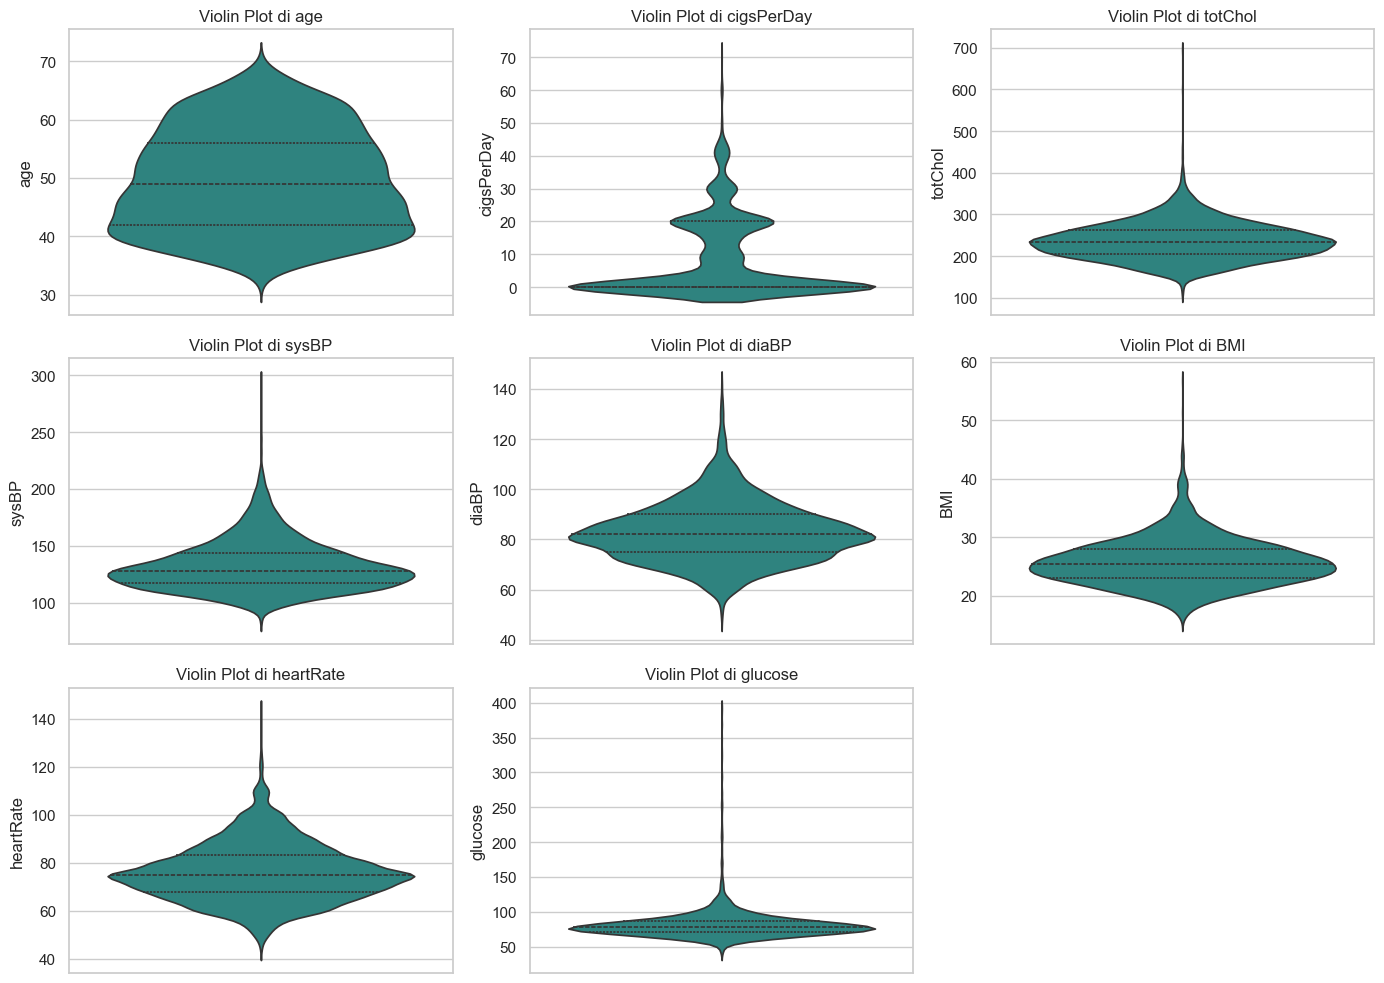

In [89]:
# ritengo poi opportuno creare dei violin plot che consentono di visualizzare l'intera distribuzione attraverso
# la larghezza del violino, che si estende dal minimo al massimo dei dati, con il picco che indica la densità maggiore
# di osservazioni. 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

quantitative_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

data_quantitative = data[quantitative_vars]

plt.figure(figsize=(14, 10))
for i, var in enumerate(quantitative_vars, start=1):
    plt.subplot(3, 3, i)
    sns.violinplot(y=data_quantitative[var], palette='viridis', inner='quartile')
    plt.title(f'Violin Plot di {var}')
    plt.xlabel('')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


### Chi-square test

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Path to your Excel file
file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# List of categorical variables to test
categorical_vars = ['male', 'currentSmoker', 'BPMeds', 'diabetes']

# Function to perform the chi-square test
def perform_chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Test del chi-quadro per {var1} e {var2}:")
    print(f"Chi-quadro: {chi2}")
    print(f"Valore p: {p}")
    alpha = 0.05
    if p < alpha:
        print(f"Rifiutiamo l'ipotesi nulla. C'è una relazione significativa tra {var1} e {var2}.\n")
    else:
        print(f"Non rifiutiamo l'ipotesi nulla. Non c'è una relazione significativa tra {var1} e {var2}.\n")

# Generate all possible combinations and perform the chi-square test
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        perform_chi_square_test(df, categorical_vars[i], categorical_vars[j])


Test del chi-quadro per male e currentSmoker:
Chi-quadro: 163.79775442993022
Valore p: 1.6747251165553976e-37
Rifiutiamo l'ipotesi nulla. C'è una relazione significativa tra male e currentSmoker.

Test del chi-quadro per male e BPMeds:
Chi-quadro: 10.925402930504507
Valore p: 0.0009485457082482395
Rifiutiamo l'ipotesi nulla. C'è una relazione significativa tra male e BPMeds.

Test del chi-quadro per male e diabetes:
Chi-quadro: 0.853470230892594
Valore p: 0.35557247639269807
Non rifiutiamo l'ipotesi nulla. Non c'è una relazione significativa tra male e diabetes.

Test del chi-quadro per currentSmoker e BPMeds:
Chi-quadro: 9.454176334434248
Valore p: 0.002106688735449743
Rifiutiamo l'ipotesi nulla. C'è una relazione significativa tra currentSmoker e BPMeds.

Test del chi-quadro per currentSmoker e diabetes:
Chi-quadro: 7.7651667866212195
Valore p: 0.005326337824393524
Rifiutiamo l'ipotesi nulla. C'è una relazione significativa tra currentSmoker e diabetes.

Test del chi-quadro per BPMed

### Correlation matrices

Ho trovato molto utile creare più matrici di correlazione. La prima include tutte le variabili numeriche, mentre le altre tre esaminano solo le variabili selezionate con una associazione logica evidente, come spiegherò più avanti. Questo approccio mi permette di analizzare e evidenziare possibili relazioni lineari tra le variabili, individuare la presenza di multicollinearità tra le variabili indipendenti, ottenere una rapida e intuitiva visualizzazione del dataset e identificare ulteriori pattern.

   male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   80.0  25.34       75.0     70.0     0  
3   95.0  28.58       65.0    103.0     1  
4   84.0  23.10       85.0     85.0     0  
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0


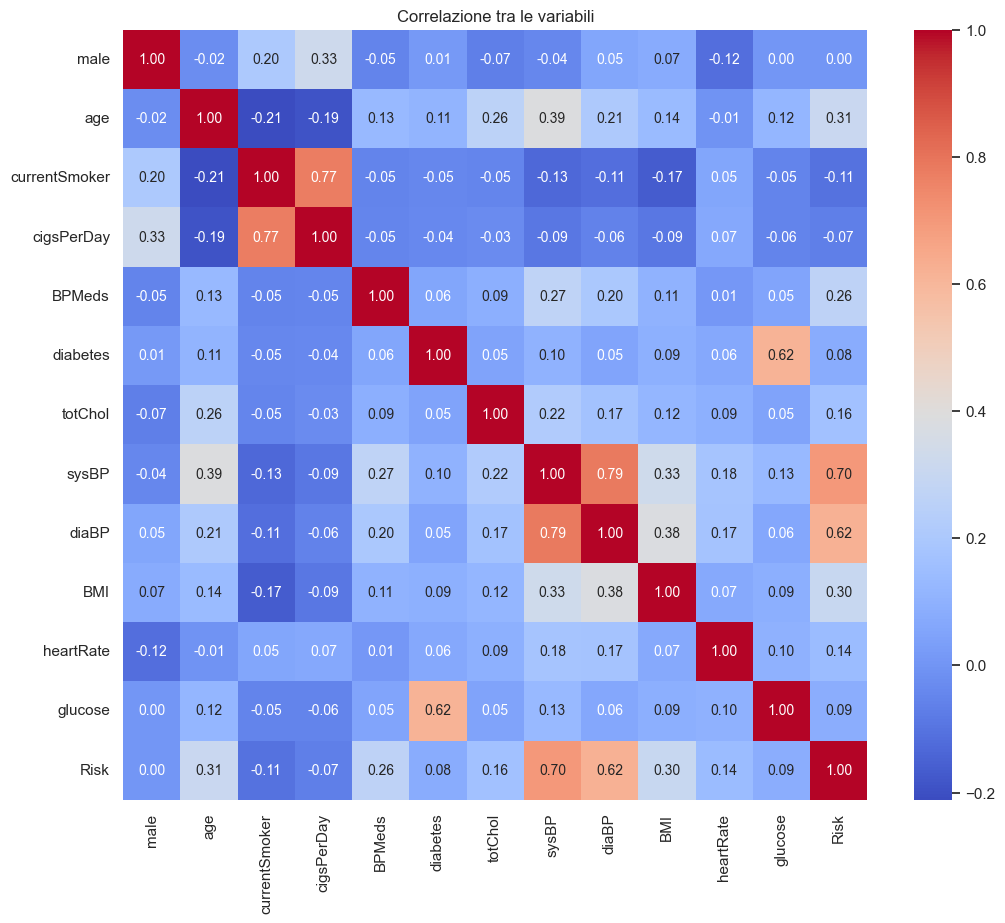

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_include = ['Age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

print(df.head())
print(df.isnull().sum())

df = df.dropna()

correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlazione tra le variabili")
plt.show()


Ho ritenuto qui interessante sottolineare il potenziale rapporto tra età, pressione sistolica e diastolica, ed indice di massa corporea. 
Come ipotizzato, infatti, all'aumentare dell'età e/o del BMI, la pressione aumenta in maniera del tutto lineare, aumentando quindi il rischio
di sviluppare ipertensione.

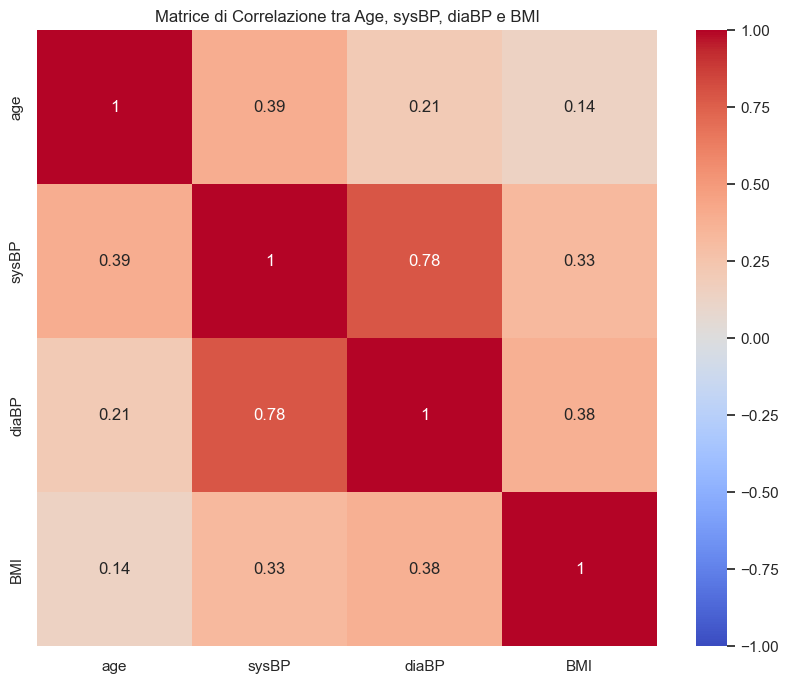

            age     sysBP     diaBP       BMI
age    1.000000  0.394053  0.205586  0.136096
sysBP  0.394053  1.000000  0.783952  0.326906
diaBP  0.205586  0.783952  1.000000  0.377360
BMI    0.136096  0.326906  0.377360  1.000000


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx' 
data = pd.read_excel(file_path)

variables_of_interest = ['age', 'sysBP', 'diaBP', 'BMI']
data_subset = data[variables_of_interest]

correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra Age, sysBP, diaBP e BMI')
plt.show()

print(correlation_matrix)


Ho giudicato poi meritevole d'attenzione la sostituzione del BMI con il numero di sigarette fumate al giorno, rispetto alla matrice precedente, convinto che il fumo potesse in qualche modo incidere direttamente sulla pressione. Effettivamente, mi sbagliavo. La relazione sembra addirittura leggermente negativa, e comunque molto vicina allo zero, suggerendo che le variabili sono praticamente indipendenti.

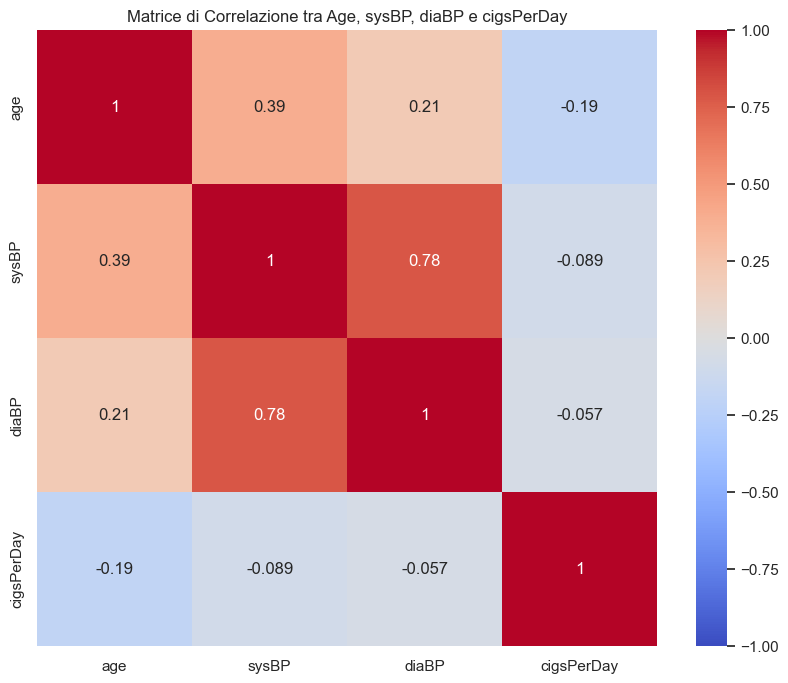

                 age     sysBP     diaBP  cigsPerDay
age         1.000000  0.394053  0.205586   -0.192959
sysBP       0.394053  1.000000  0.783952   -0.088797
diaBP       0.205586  0.783952  1.000000   -0.056715
cigsPerDay -0.192959 -0.088797 -0.056715    1.000000


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

variables_of_interest = ['age', 'sysBP', 'diaBP', 'cigsPerDay']
data_subset = data[variables_of_interest]

correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra Age, sysBP, diaBP e cigsPerDay')
plt.show()

print(correlation_matrix)


Ho ritenuto poi molto utile stressare il rapporto ancora tra età, colesterolo, indice di massa corporea e glucosio, tutte metriche legate all'alimentazione, convinto in realtà che le relazioni fossero molto più forti. L'unica, leggermente rilevante, è che, con l'avanzare dell'età, anche i livelli di colesterolo nel sangue potrebbero aumentare. Le altre, come risulta anche dalla heatmap, sono molto flebili, alcune tendenti addirittura allo zero.

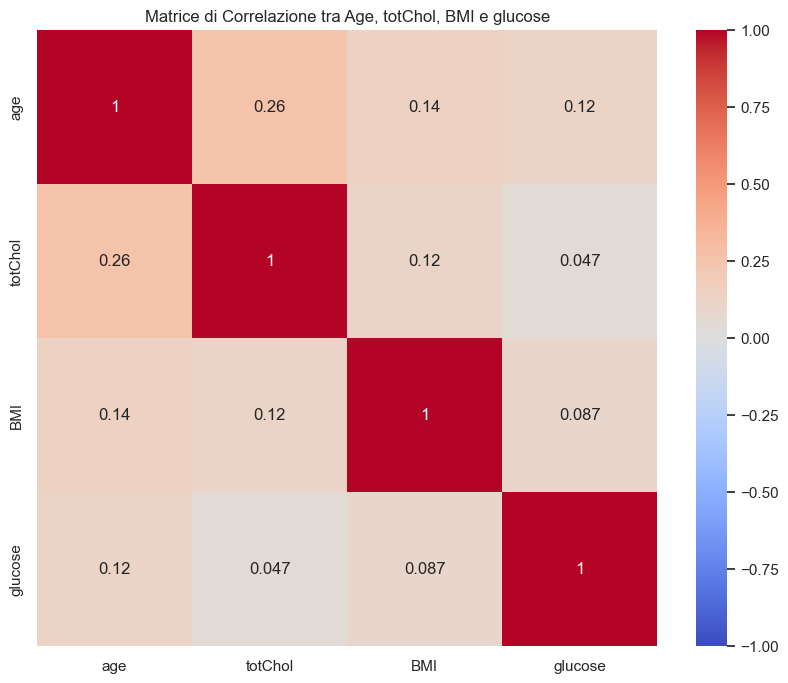

              age   totChol       BMI   glucose
age      1.000000  0.262554  0.136096  0.122356
totChol  0.262554  1.000000  0.115992  0.046538
BMI      0.136096  0.115992  1.000000  0.087389
glucose  0.122356  0.046538  0.087389  1.000000


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

variables_of_interest = ['age', 'totChol', 'BMI', 'glucose']
data_subset = data[variables_of_interest]

correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra Age, totChol, BMI e glucose')
plt.show()

print(correlation_matrix)


## Modeling and inference

### Logistic regression

Tra i vari modelli da poter utilizzare, ho ritenuto utile anche quello della regressione logistica, al fine di predire l'etichetta di rischio di sviluppo dell'ipertensione, poichè specificamente progettata per modellare variabili di risposta binarie o categoriche (come, in questo caso, "rischio" o "non rischio"). Fondamentale poi il fatto che, questo tipo di regressione, consenta di comprendere la certezza o incertezza della predizione, tramite una serie di metriche. Molto utile poi l'analisi dell' "importanza delle variabili", del peso specifico cioè che ogni variabile ha sul modello. 
Inoltre, questo particolare modello può gestire variabili sia categoriche che continue, come ad esempio età, genere, vari indicatori di salute, e via discorrendo.

Accuracy: 0.8836589698046181
Precision: 0.8425925925925926
Recall: 0.773371104815864
ROC AUC: 0.8536971953574792
Confusion Matrix:
[[722  51]
 [ 80 273]]


C:\Users\frast\AppData\Local\Temp\ipykernel_13552\178766291.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


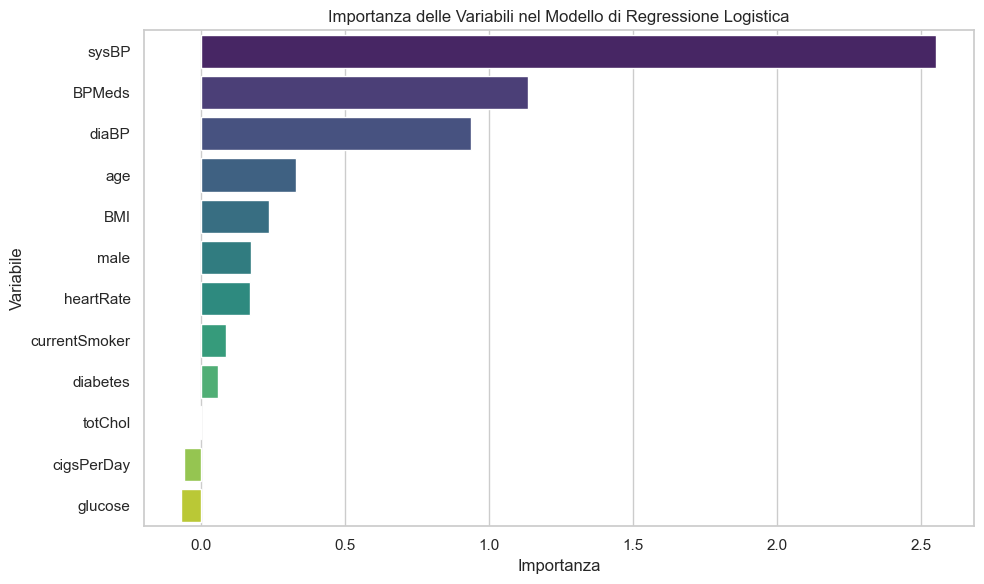

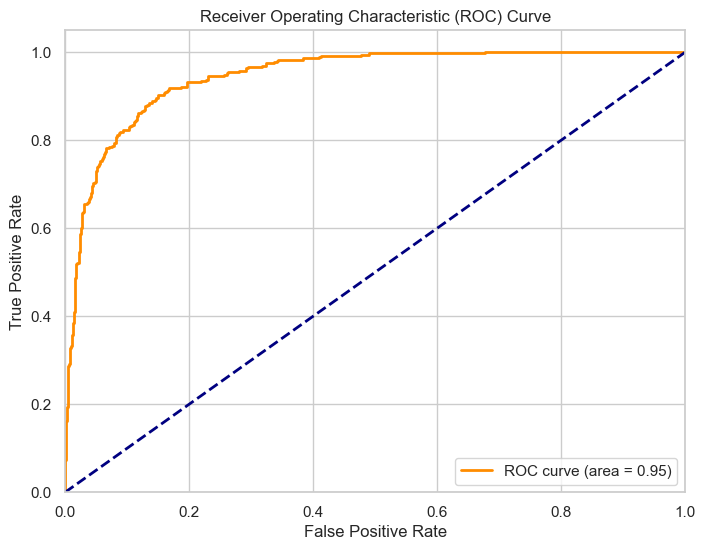

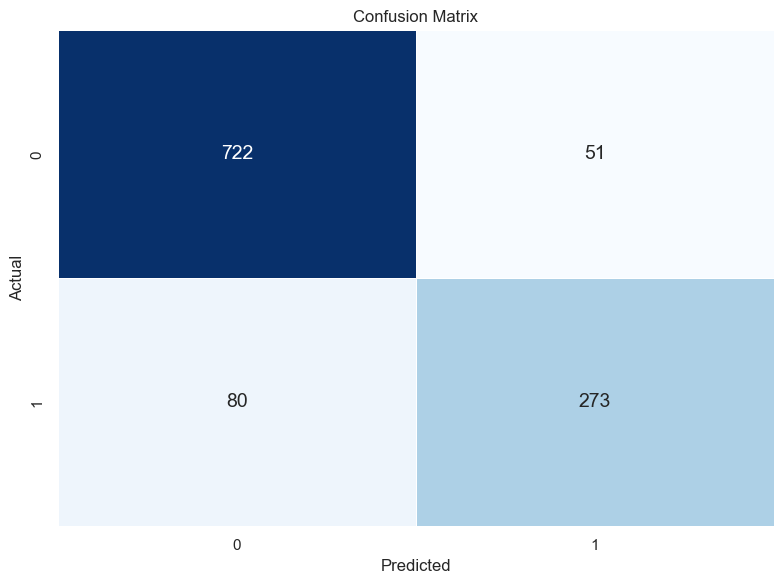

In [100]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

# rimuovo eventuali righe con valori NaN
data = data.dropna()

# definisco le variabili indipendenti (features) e dipendente (target)
X = data.drop('Risk', axis=1)
y = data['Risk']

# suddivido i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardizzo features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# creo ed addestro modello di regressione logistica
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# predizione sui dati di test
y_pred = model.predict(X_test_scaled)

# calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# calcolo e visualizzazione dell'importanza delle variabili
importance = model.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plot dell'importanza delle variabili
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Variabili nel Modello di Regressione Logistica')
plt.xlabel('Importanza')
plt.ylabel('Variabile')
plt.tight_layout()
plt.show()

# plot della curva ROC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# visualizzazione della Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


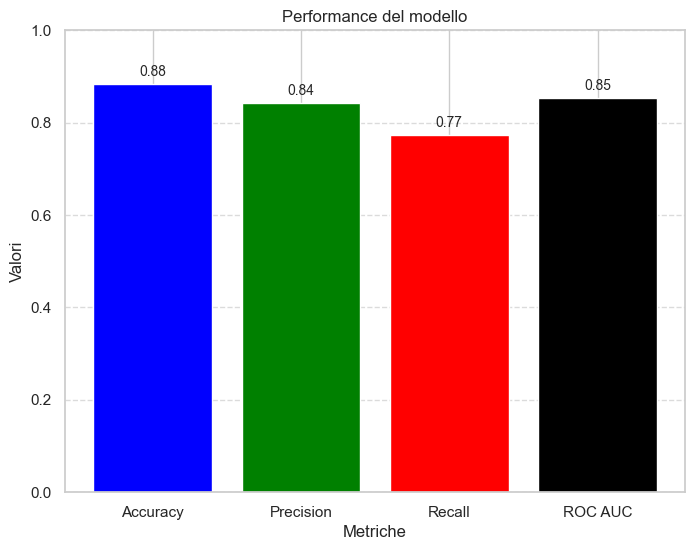

In [31]:
# riporto graficamente valutazione delle metrice

import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8836589698046181, 0.8425925925925926, 0.773371104815864, 0.8536971953574792]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Provo ad apportare alcuni miglioramenti, con l'implementazione di Grid Search, che è una tecnica di ottimizzazione degli iperparametri di un modello di apprendimento automatico, al fine di migliorarne le prestazioni. Nella fattispecie, per una regressione logistica, la Grid Search può aiutare a trovare i valori ottimali per parametri come C, che regola la forza della regolarizzazione, e il tipo di penalizzazione ('l1' o 'l2').

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8836589698046181
Precision: 0.8425925925925926
Recall: 0.773371104815864
ROC AUC: 0.9455306392444727
Confusion Matrix:
[[722  51]
 [ 80 273]]


C:\Users\frast\AppData\Local\Temp\ipykernel_20640\3605491164.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


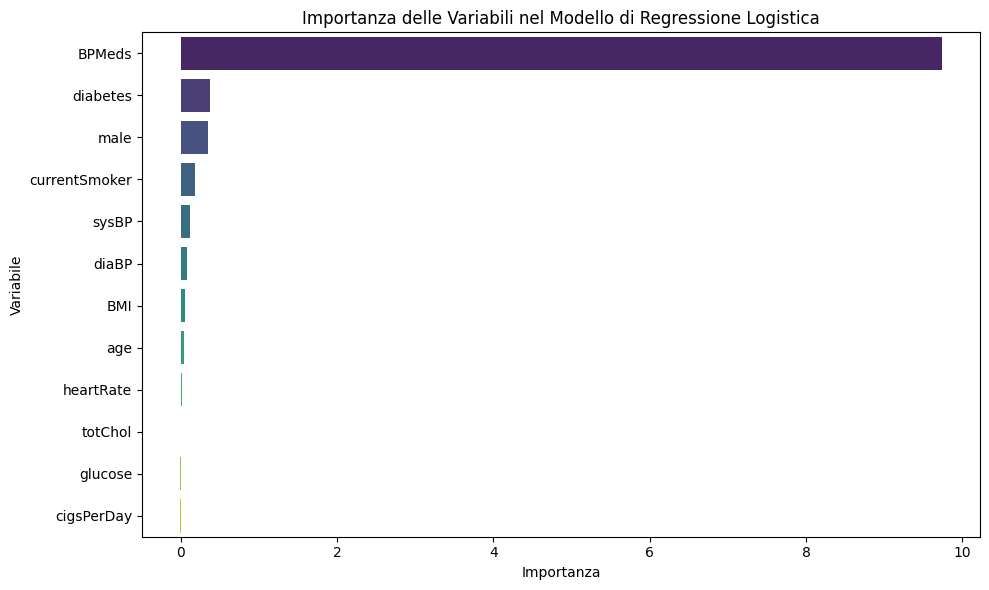

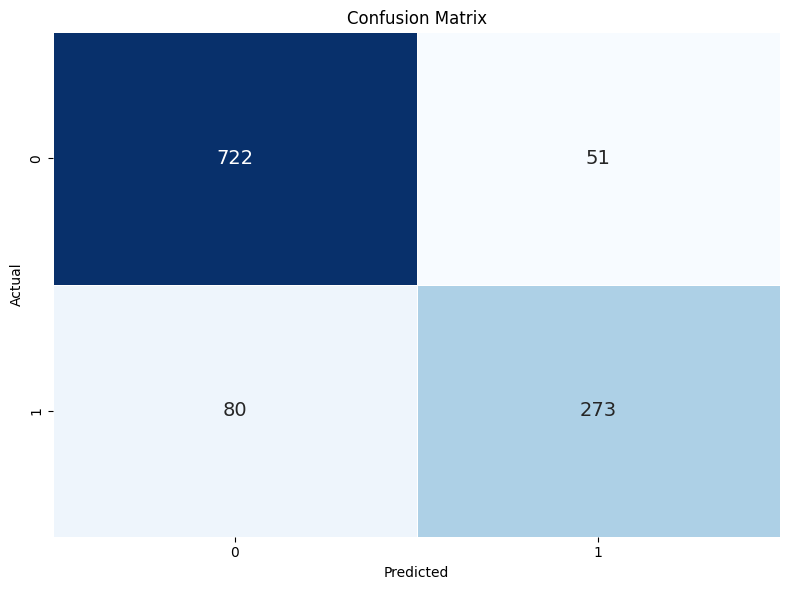

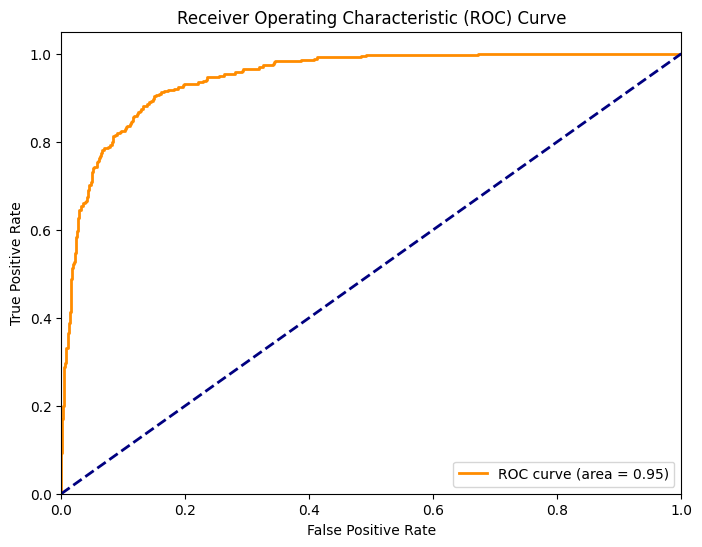

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx' 
data = pd.read_excel(file_path)

data = data.dropna()

# variabili indipendenti (features) e dipendente (target)
X = data.drop('Risk', axis=1)
y = data['Risk']

# suddivido i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

# definisco griglia dei parametri per la ricerca degli iperparametri
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# ricerco iperparametri ottimali con cross-validation
# cv=5 indica che utilizziamo una validazione incrociata a 5 pieghe per valutare le combinazioni di parametri
# scoring='accuracy' indica che usiamo l'accuratezza come metrica di valutazione
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# modello con i migliori iperparametri trovati
best_model = grid_search.best_estimator_

# addestramento del modello con i dati di training
best_model.fit(X_train, y_train)

# valutazione del modello
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# visualizzazione dell'importanza delle variabili
importance = best_model.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Variabili nel Modello di Regressione Logistica')
plt.xlabel('Importanza')
plt.ylabel('Variabile')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


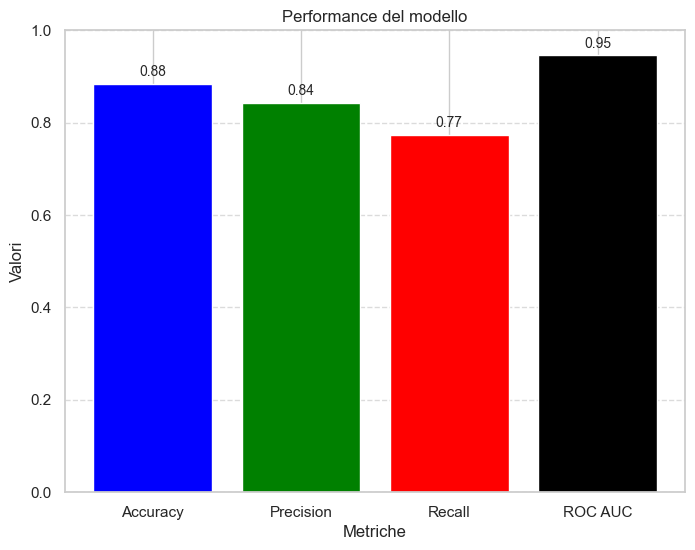

In [64]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8836589698046181, 0.8425925925925926, 0.773371104815864, 0.945548963055532]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Accuracy: 0.8730017761989343
Precision: 0.7586206896551724
Recall: 0.8725212464589235
ROC AUC: 0.9454390201891751
Confusion Matrix:
[[675  98]
 [ 45 308]]


C:\Users\frast\AppData\Local\Temp\ipykernel_13552\1009601807.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


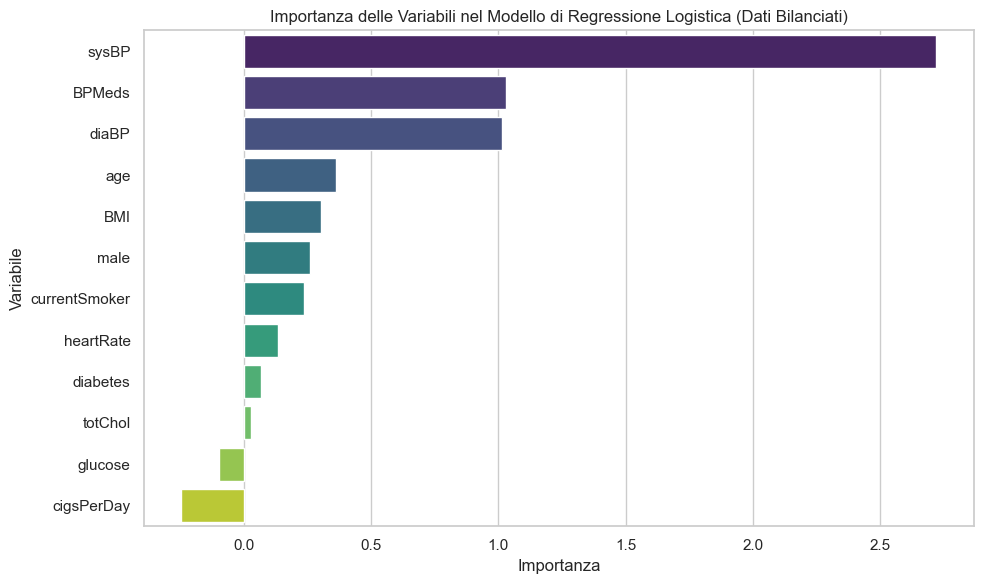

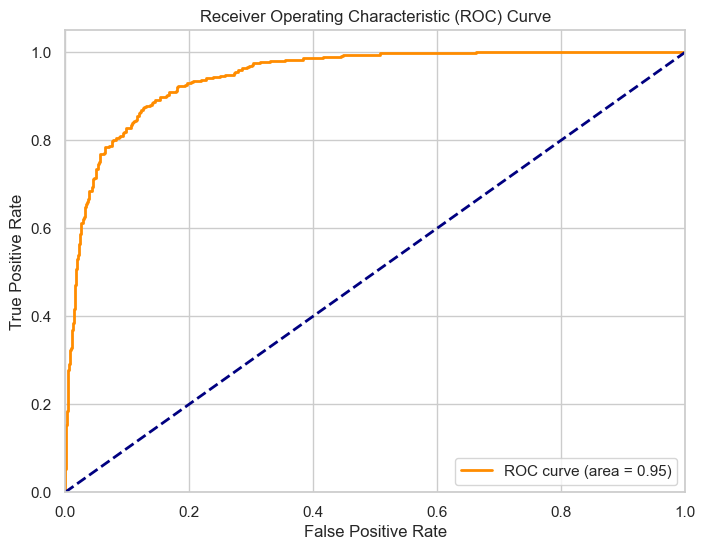

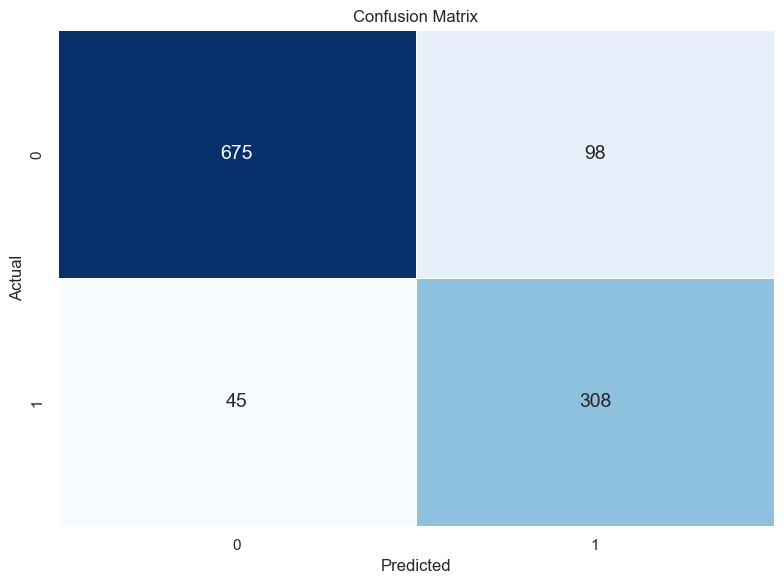

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  # Sostituisci con il percorso del tuo file Excel
data = pd.read_excel(file_path)

data = data.dropna()

X = data.drop('Risk', axis=1)
y = data['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# applicazione di StandardScaler per standardizzare le features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applicazione di undersampling della classe maggioritaria
X_train_resampled, y_train_resampled = resample(X_train_scaled[y_train == 0], y_train[y_train == 0],
                                               replace=False, n_samples=sum(y_train == 1), random_state=42)

X_train_balanced = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(X_train_scaled[y_train == 1])])
y_train_balanced = pd.concat([pd.Series(y_train_resampled), pd.Series(y_train[y_train == 1])])

model = LogisticRegression()

# addestramento del modello con i dati di training bilanciati
model.fit(X_train_balanced, y_train_balanced)

# valutazione del modello sui dati di test
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

importance = model.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Variabili nel Modello di Regressione Logistica (Dati Bilanciati)')
plt.xlabel('Importanza')
plt.ylabel('Variabile')
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


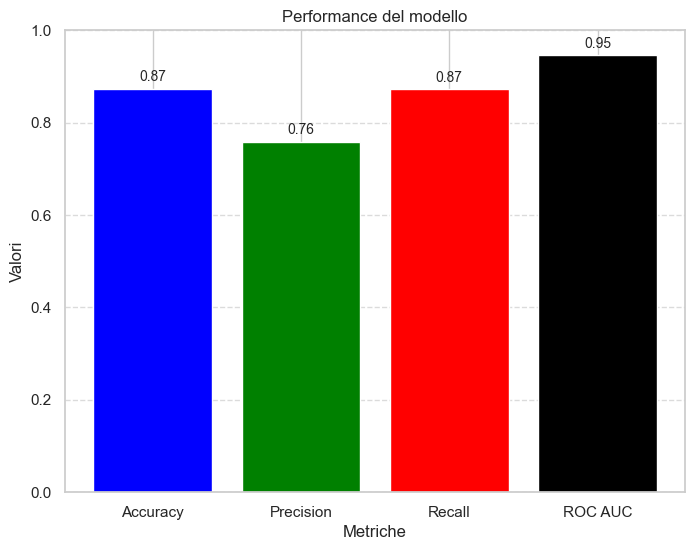

In [65]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8730017761989343, 0.7586206896551724, 0.8725212464589235, 0.9454390201891751]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


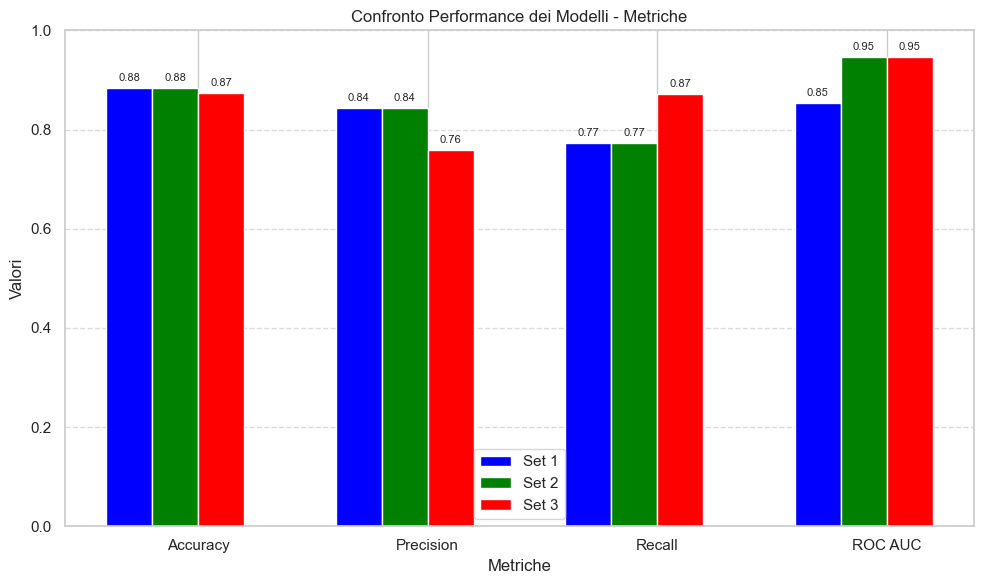

In [67]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_set1 = [0.8836589698046181, 0.8425925925925926, 0.773371104815864, 0.8536971953574792]
values_set2 = [0.8836589698046181, 0.8425925925925926, 0.773371104815864, 0.945548963055532]
values_set3 = [0.8730017761989343, 0.7586206896551724, 0.8725212464589235, 0.9454390201891751]

plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(metrics))

bars_set1 = plt.bar(index - 1.5 * bar_width, values_set1, width=bar_width, color='blue', label='Set 1')
for bar, value in zip(bars_set1, values_set1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

bars_set2 = plt.bar(index - 0.5 * bar_width, values_set2, width=bar_width, color='green', label='Set 2')
for bar, value in zip(bars_set2, values_set2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

bars_set3 = plt.bar(index + 0.5 * bar_width, values_set3, width=bar_width, color='red', label='Set 3')
for bar, value in zip(bars_set3, values_set3):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.xticks(index, metrics)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Confronto Performance dei Modelli - Metriche')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


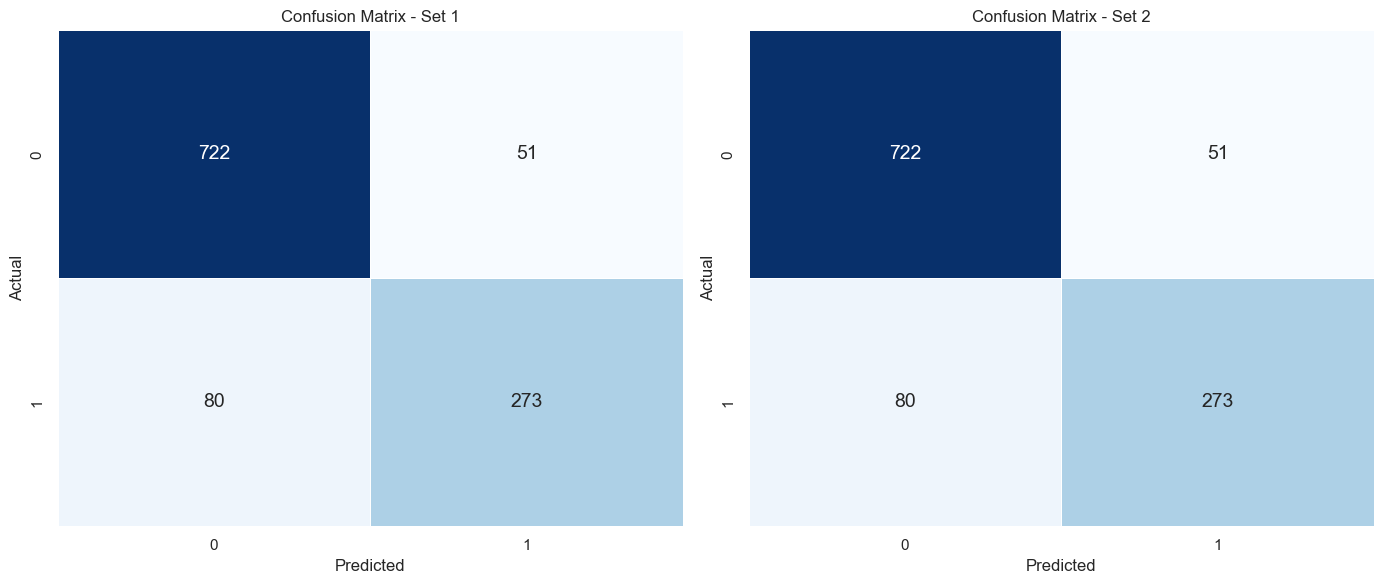

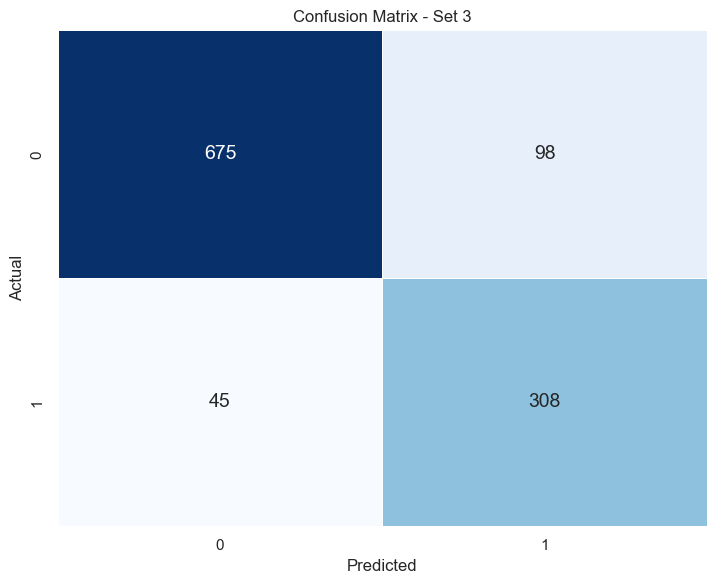

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conf_matrix_set1 = np.array([[722, 51], [80, 273]])
conf_matrix_set2 = np.array([[722, 51], [80, 273]])
conf_matrix_set3 = np.array([[675, 98], [45, 308]])

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_set1, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Set 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_set2, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Set 2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_set3, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Set 3')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Decision trees

Ho ritenuto opportuno utilizzare un algoritmo di decision tree, oltre che la regressione logistica per diversi motivi complementari. 
Mentre la regressione logistica è utile per modellare la relazione lineare tra le variabili indipendenti e la variabile di risposta binaria (rischio di ipertensione), l'algoritmo di decision tree offre vantaggi aggiuntivi, come:

Gestione delle interazioni non lineari: A differenza della regressione logistica, che assume una relazione lineare tra le variabili indipendenti e la variabile di risposta, i decision tree possono catturare interazioni complesse e non lineari tra le variabili predittorie. 

Interpretazione diretta: I decision tree forniscono una rappresentazione visuale chiara delle decisioni e delle divisioni che il modello prende per classificare le osservazioni. Questo rende più facile interpretare come le caratteristiche influenzano la predizione del rischio di ipertensione, offrendo insight immediato sulle variabili più importanti nel processo decisionale del modello.

Robustezza nei confronti di distribuzioni non normali.

Capacità di gestire feature categoriche senza codifica: I decision tree possono gestire direttamente variabili categoriche senza la necessità di codifiche come le variabili dummy, semplificando il processo di preparazione dei dati.

Concretamente, l'utilizzo di un algoritmo di decision tree insieme alla regressione logistica arricchisce l'analisi consentendo di esplorare e modellare relazioni più complesse e non lineari nei dati, migliorando la comprensione e la capacità predittiva del modello di rischio di ipertensione.

Accuracy: 0.8507992895204263
Precision: 0.7493261455525606
Recall: 0.7875354107648725
ROC AUC: 0.83361246605514
[[680  93]
 [ 75 278]]


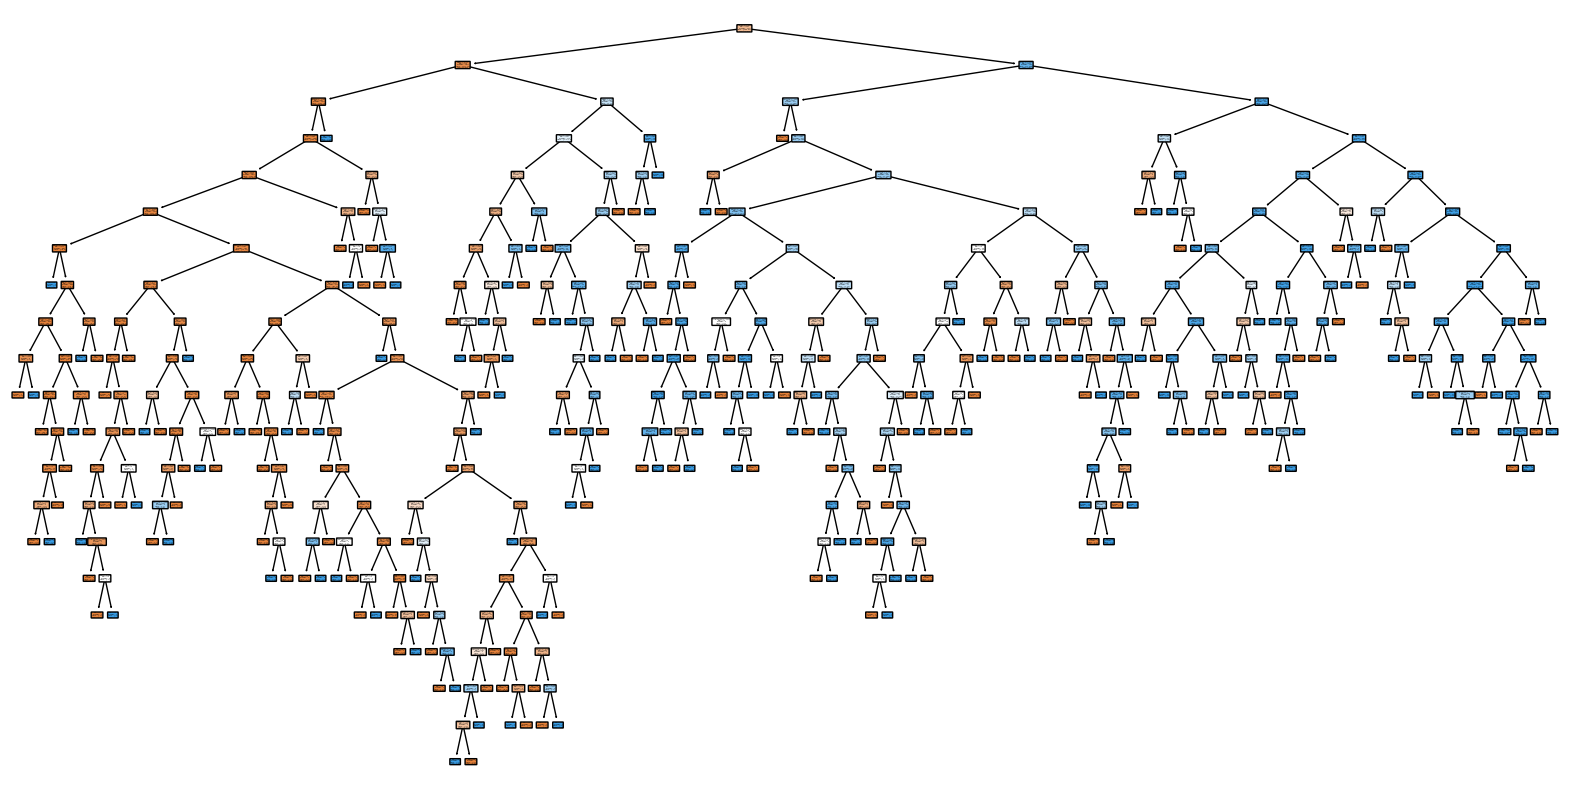

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

data = data.dropna() 

# separo le variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('Risk', axis=1)
y = data['Risk']

# codifico le variabili categoriche in variabili dummy
# l'idea è di rendere il modello più efficiente nell'interpretazione delle relazioni tra le caratteristiche e il target
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardizzo le caratteristiche
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# inizializzo e addestro il modello di Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# previsioni sul test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Risk', 'Risk'], rounded=True)
plt.show()

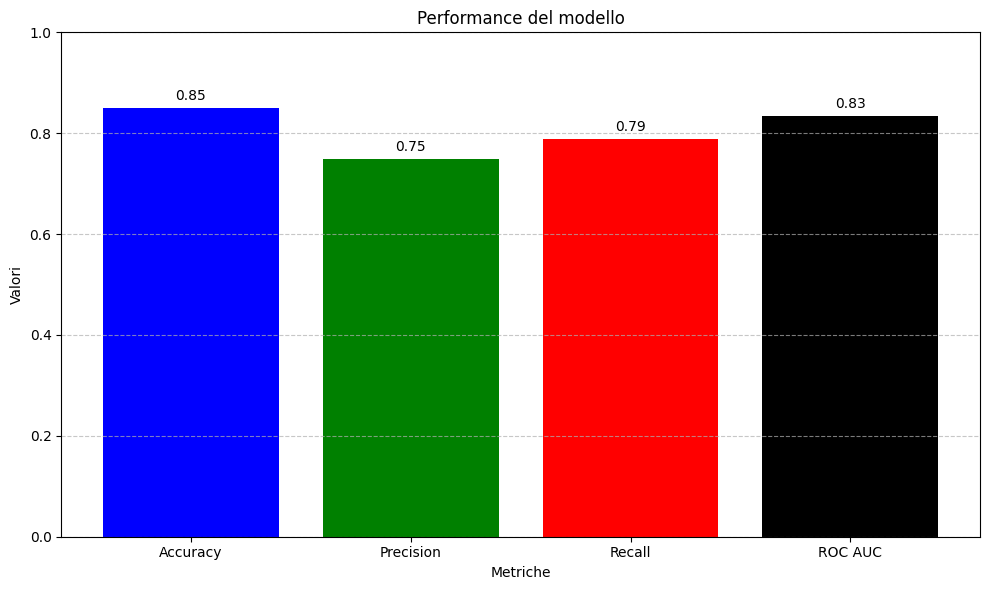

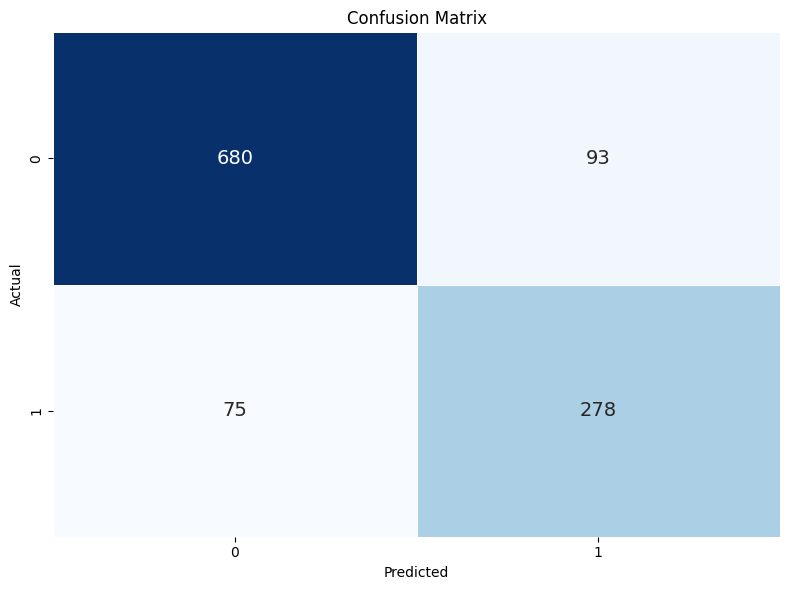

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8507992895204263, 0.7493261455525606, 0.7875354107648725, 0.83361246605514]

conf_matrix = np.array([[680, 93], [75, 278]])

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


          Feature  Importance
0           sysBP    0.860303
1           diaBP    0.099854
2          BPMeds    0.031519
3             age    0.005179
4         glucose    0.003144
5      cigsPerDay    0.000000
6            male    0.000000
7   currentSmoker    0.000000
8         totChol    0.000000
9        diabetes    0.000000
10            BMI    0.000000
11      heartRate    0.000000


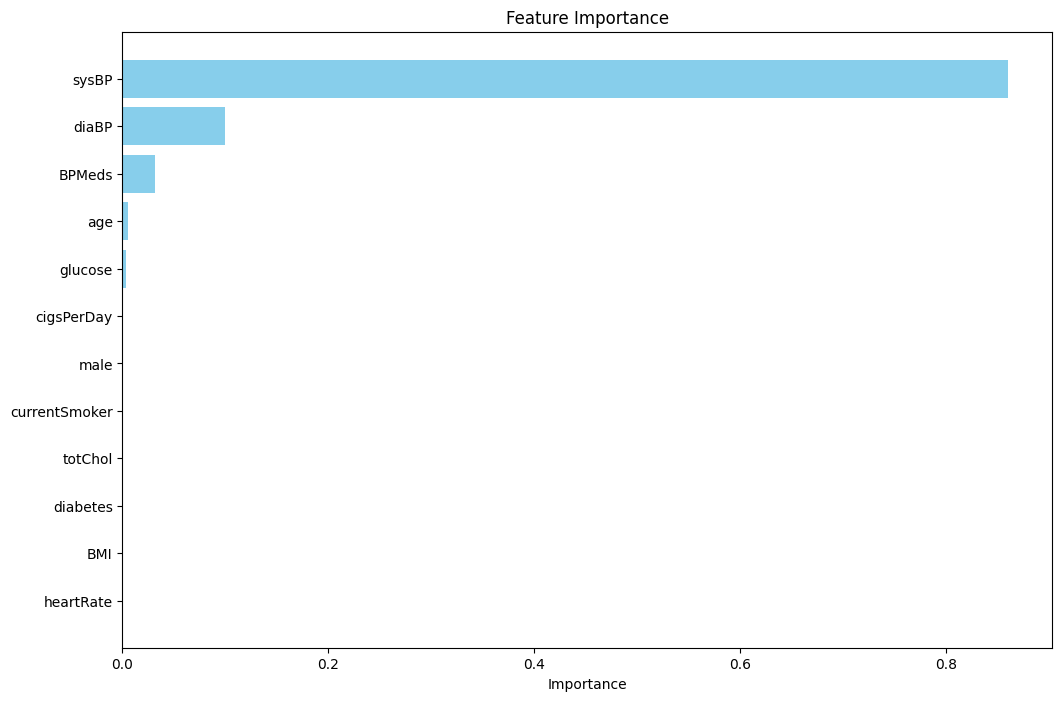

In [23]:
# calcolo dell'importanza delle variabili
importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# ordino il DataFrame per visualizzare le variabili più importanti per prime
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

# plot dell'importanza delle variabili
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertiamo l'asse y per avere la variabile più importante in alto
plt.show()


Ciò su cui vado essenzialmente a lavorare, per cercare di migliorare il modello, sono le caratteristiche notevoli dell'albero,
ed in particolare:

max_depth, ovvero la profondità massima, che controlla la complessità dell'albero decisionale. Valori diversi di max_depth permettono di esplorare modelli con diversi livelli di profondità, da quelli molto semplici (max_depth=None) a quelli più profondi (10, 20, 30), che potrebbero catturare relazioni più complesse nei dati.

min_samples_split, ovvero il numero minimo di campioni richiesti per suddividere un nodo interno dell'albero. Valori più alti rendono il modello meno suscettibile al rumore e all'overfitting, mentre valori più bassi possono consentire di catturare pattern più specifici nei dati.

min_samples_leaf, che specifica il numero minimo di campioni necessari per formare una foglia dell'albero. Un valore più alto può aiutare a prevenire l'overfitting, poiché impone che ogni foglia abbia un numero minimo di punti dati.

max_leaf_nodes, che limita il numero massimo di foglie che l'albero può avere. Questo parametro è utile per controllare la complessità dell'albero e può prevenire l'overfitting limitando la sua crescita.

Best parameters found: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8916518650088809
Precision: 0.8063660477453581
Recall: 0.8611898016997167
ROC AUC: 0.8908047451341119
[[700  73]
 [ 49 304]]


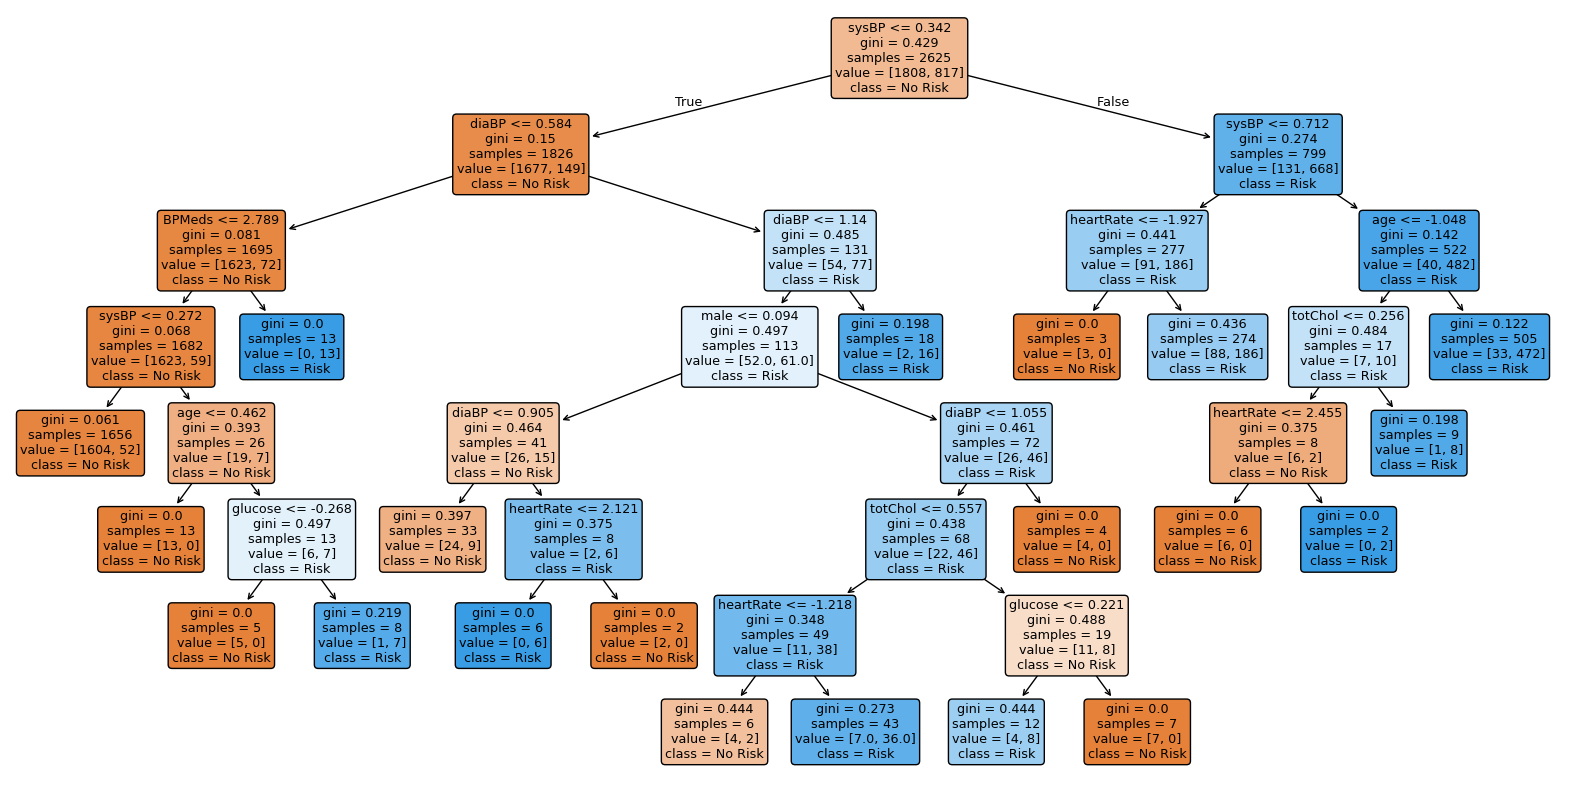

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)

# rimuovo le righe con valori mancanti, se necessario
data = data.dropna()  

# divido i dati in variabili indipendenti (X) e dipendente (y)
X = data.drop('Risk', axis=1)
y = data['Risk']

# codifico le variabili categoriche in variabili dummy
X = pd.get_dummies(X, drop_first=True)

# divido i dati in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# inizializzo lo StandardScaler per standardizzare le caratteristiche
# lo StandardScaler è utilizzato per standardizzare le caratteristiche del dataset
# rende le caratteristiche distribuite normalmente con media zero e deviazione standard unitaria.
scaler = StandardScaler()

# standardizzo le caratteristiche del training set
# è fondamentale applicare la stessa trasformazione (standardizzazione) sia al training set che al test set
# garantisce che i dati di test siano trattati nello stesso modo dei dati di training, evitando problemi di leakage
X_train_scaled = scaler.fit_transform(X_train)
# applico la stessa trasformazione al test set
X_test_scaled = scaler.transform(X_test)

# definisco la griglia dei parametri per la ricerca degli iperparametri del Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 20, 50, 100]
}

# inizializzo la GridSearchCV per trovare i migliori iperparametri
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# eseguo la ricerca degli iperparametri utilizzando il training set standardizzato
grid_search.fit(X_train_scaled, y_train)

# ottengo il miglior modello trovato
best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

# effettuo le previsioni sul test set utilizzando il miglior modello
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# visualizzo l'albero decisionale
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Risk', 'Risk'], rounded=True)
plt.show()


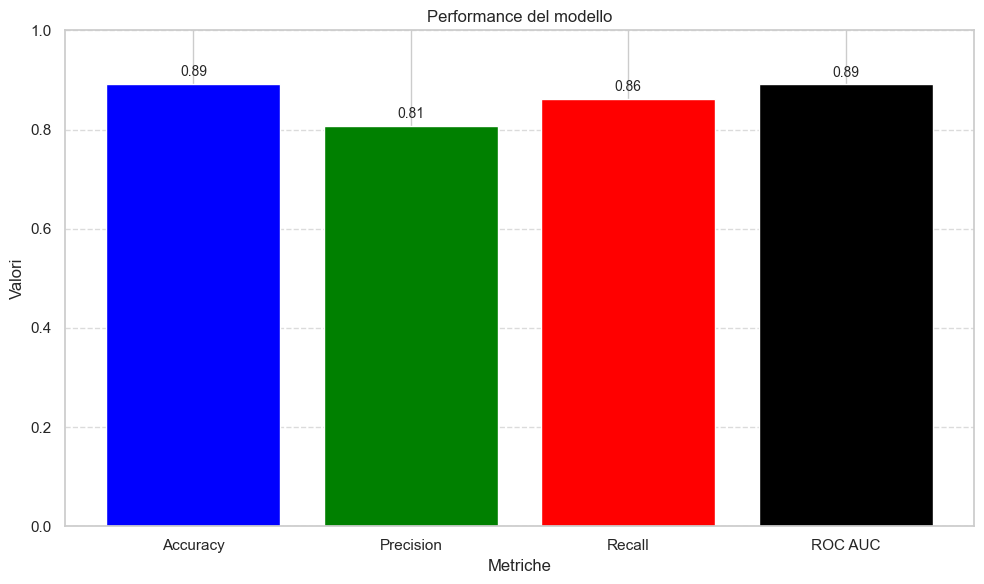

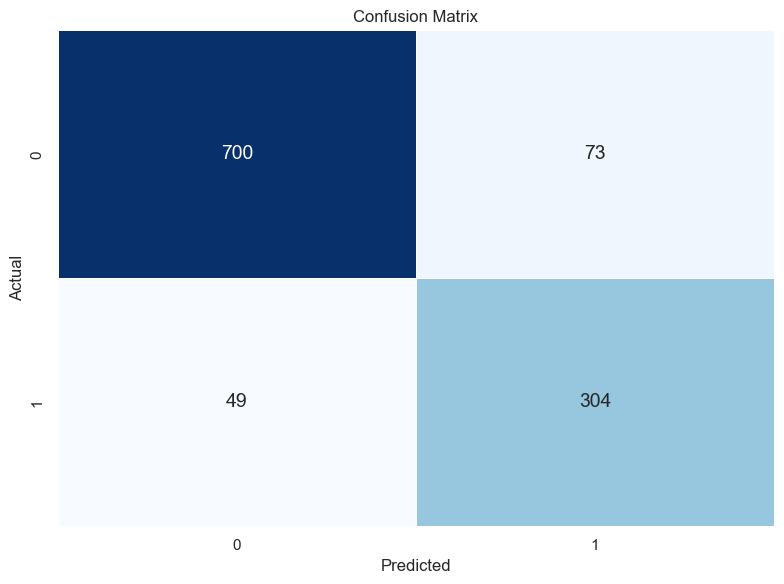

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8916518650088809, 0.8063660477453581, 0.8611898016997167, 0.8908047451341119]

conf_matrix = np.array([[700, 73], [49, 304]])

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


          Feature  Importance
0           sysBP    0.860303
1           diaBP    0.099854
2          BPMeds    0.031519
3             age    0.005179
4         glucose    0.003144
5      cigsPerDay    0.000000
6            male    0.000000
7   currentSmoker    0.000000
8         totChol    0.000000
9        diabetes    0.000000
10            BMI    0.000000
11      heartRate    0.000000


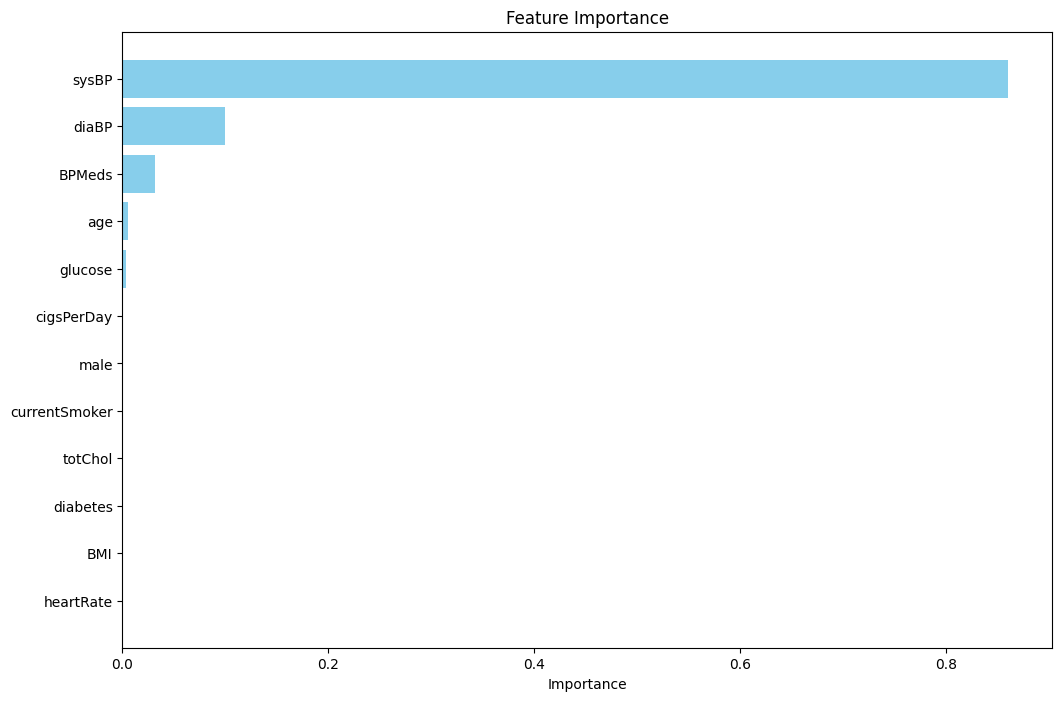

In [21]:
# calcolo dell'importanza delle variabili
importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# ordino il DataFrame per visualizzare le variabili più importanti per prime
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

# plot dell'importanza delle variabili
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertiamo l'asse y per avere la variabile più importante in alto
plt.show()


Provo a migliorare ancora un po' le prestazioni, e l'unico modo che ritengo utile per riuscire nel mio intento è quello di rimpicciolire ancora un po' l'albero, regolando quindi i parametri della griglia per la ricerca degli iperparametri (param_grid) e nella standardizzazione delle caratteristiche con lo StandardScaler.

Nella fattispecie, mentre prima i parametri erano 
max_depth: Include None (senza limite di profondità) e valori discreti fino a 30.
min_samples_split: Valori più bassi includono 2, mentre il massimo è 20.
min_samples_leaf: Valori minimi da 1, fino a 10.
max_leaf_nodes: Include None, e valori fino a 100

per cercare di migliorare il modello, ho ritenuto opportuno di portare i valori a
max_depth: Includi solo valori discreti di 3, 5, e 10.
min_samples_split: Include 10, 20, e 30.
min_samples_leaf: Include 5, 10, e 20.
max_leaf_nodes: Include 10, 20, e 30

perchè, essendo la griglia più limitata, riesce a concentrarsi meglio su valori discreti e ridotti per ciascun iperparametro.
E' possibile che il codice precedente possa essere più adatto per esplorare una gamma più ampia di possibilità, mentre il codice attuale possa essere più orientato verso un'ottimizzazione specifica e mirata degli iperparametri.

Best parameters found: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Accuracy: 0.8969804618117229
Precision: 0.7869249394673123
Recall: 0.9206798866855525
ROC AUC: 0.924738610835236
[[685  88]
 [ 28 325]]


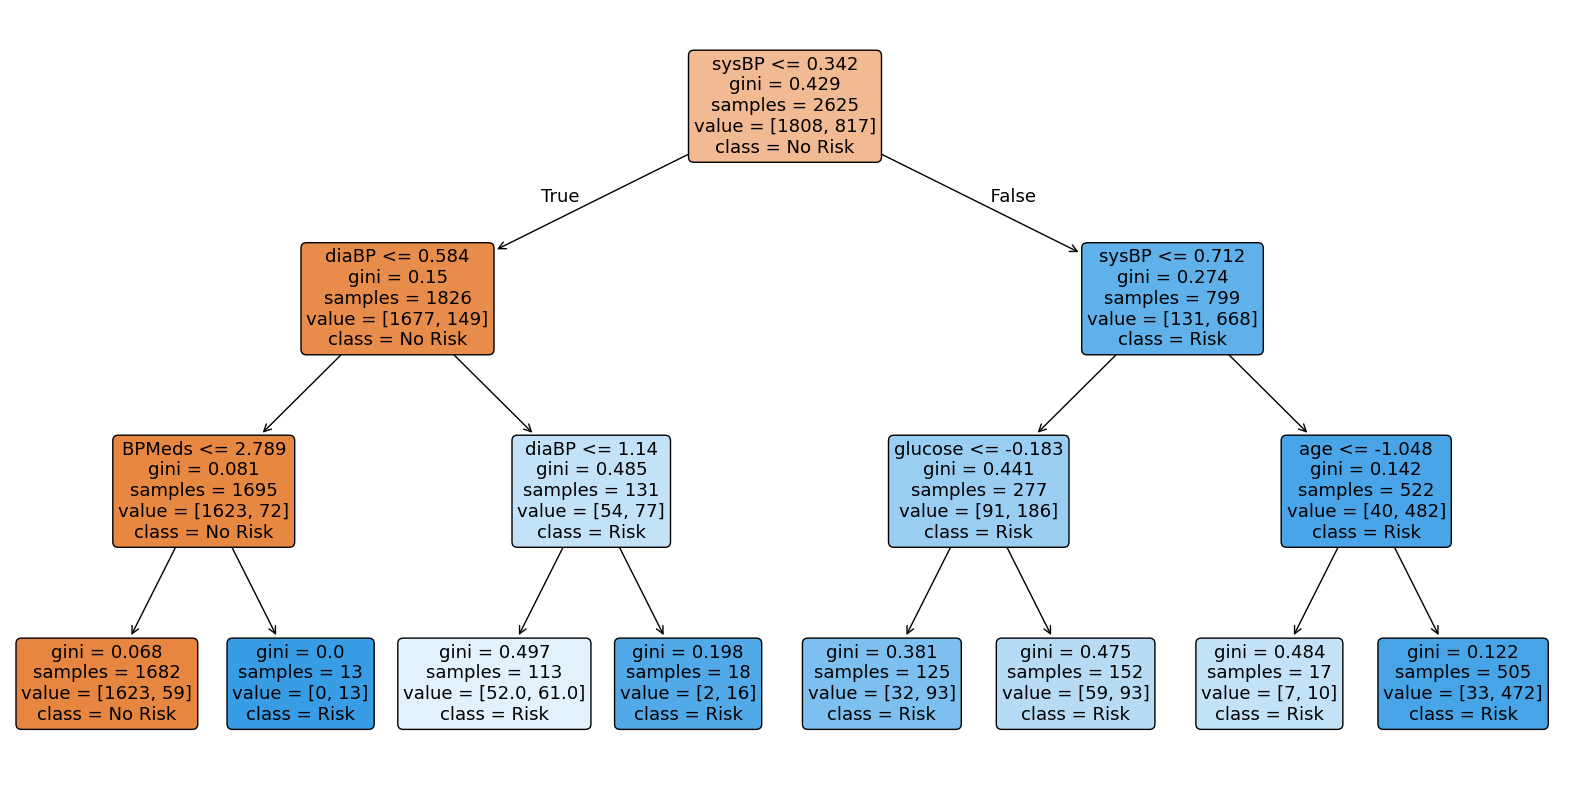

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt


file_path = r'C:\\Users\\frast\\Desktop\\Ht2.xlsx'  
data = pd.read_excel(file_path)


data = data.dropna() 


X = data.drop('Risk', axis=1)
y = data['Risk']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_leaf_nodes': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')


y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')


conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Risk', 'Risk'], rounded=True)
plt.show()

          Feature  Importance
0           sysBP    0.860303
1           diaBP    0.099854
2          BPMeds    0.031519
3             age    0.005179
4         glucose    0.003144
5      cigsPerDay    0.000000
6            male    0.000000
7   currentSmoker    0.000000
8         totChol    0.000000
9        diabetes    0.000000
10            BMI    0.000000
11      heartRate    0.000000


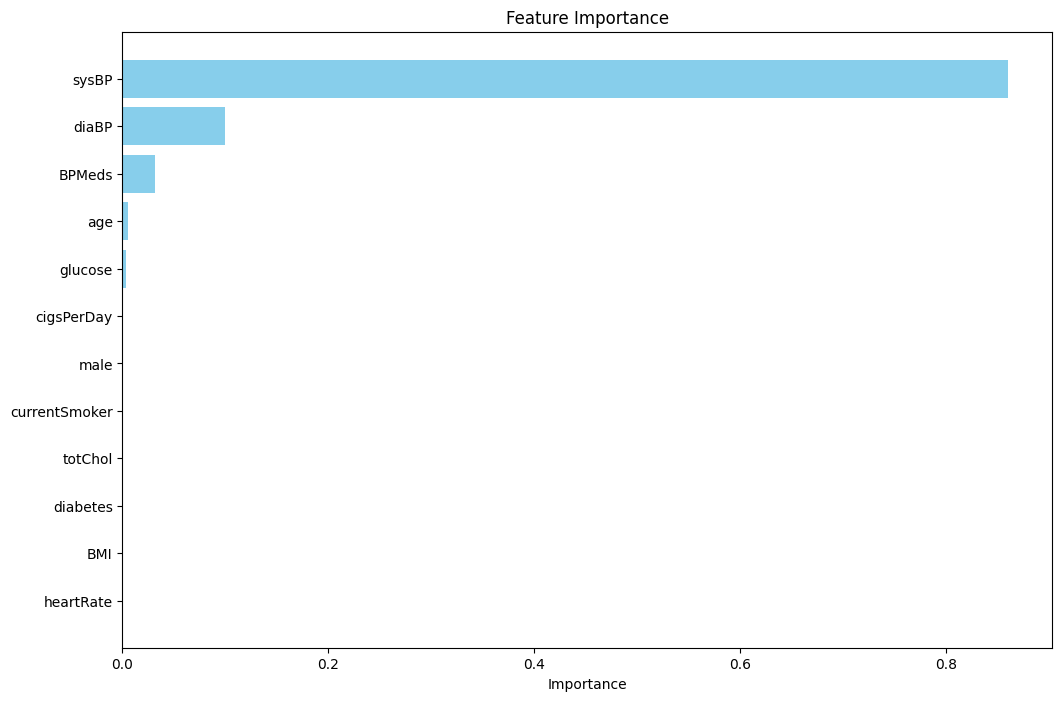

In [20]:
# calcolo dell'importanza delle variabili
importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# ordino il DataFrame per visualizzare le variabili più importanti per prime
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

# plot dell'importanza delle variabili
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertiamo l'asse y per avere la variabile più importante in alto
plt.show()


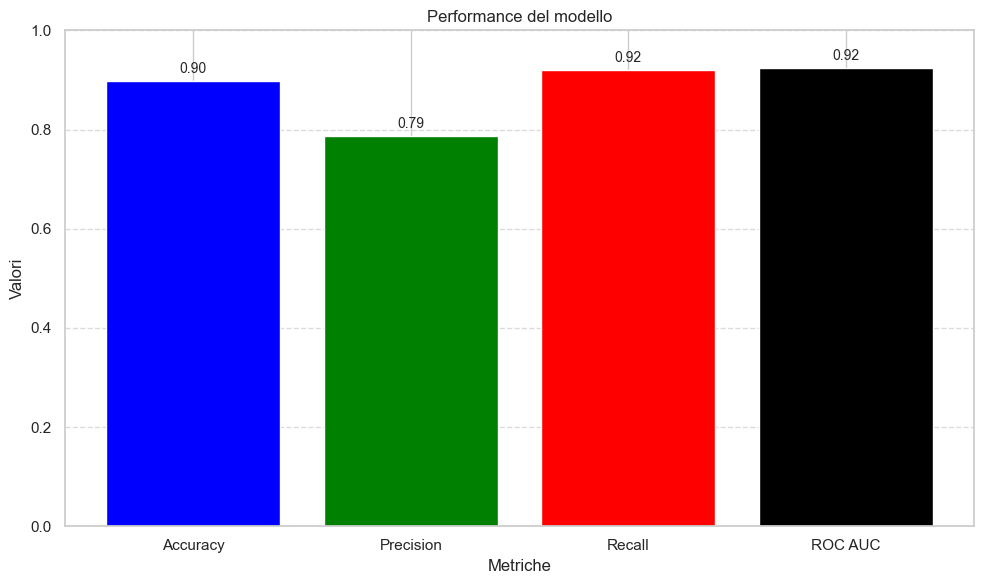

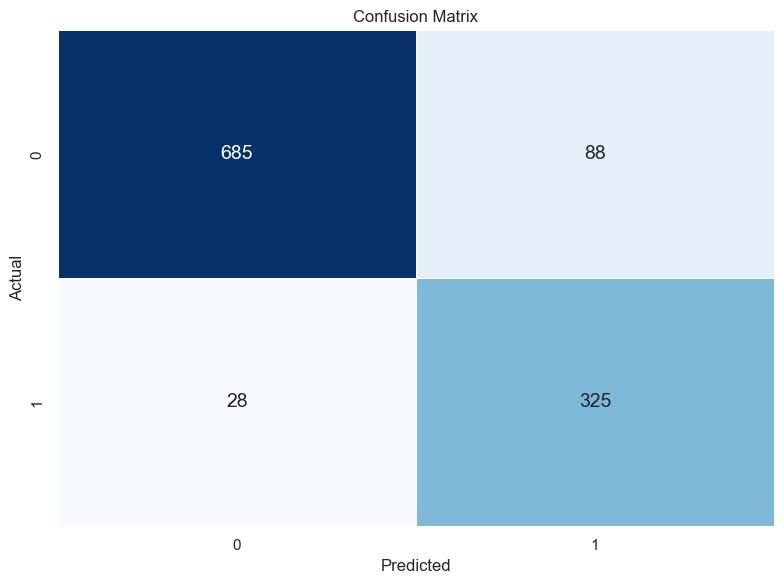

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values = [0.8969804618117229, 0.7869249394673123, 0.9206798866855525, 0.924738610835236]

conf_matrix = np.array([[685, 88], [28, 325]])

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'black'])
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


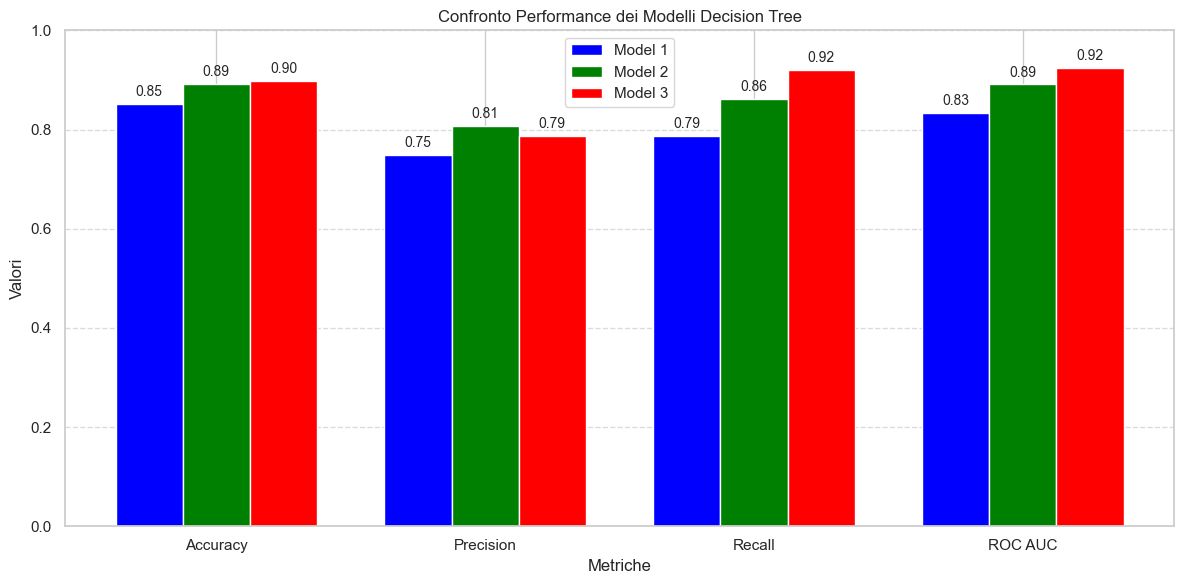

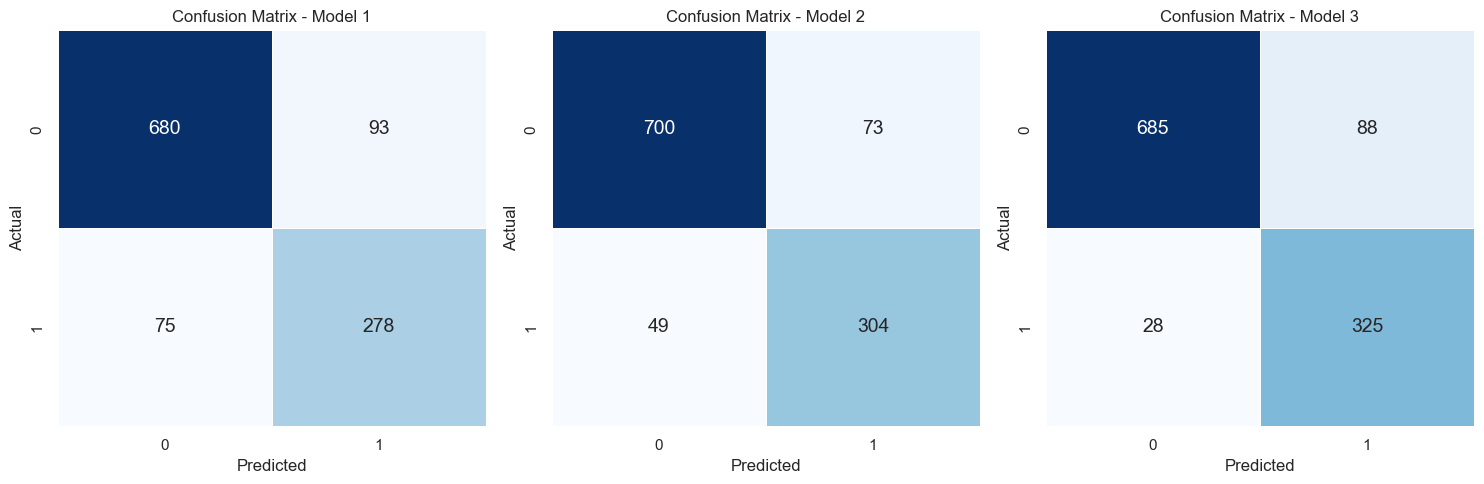

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_1 = [0.8507992895204263, 0.7493261455525606, 0.7875354107648725, 0.83361246605514]
values_2 = [0.8916518650088809, 0.8063660477453581, 0.8611898016997167, 0.8908047451341119]
values_3 = [0.8969804618117229, 0.7869249394673123, 0.9206798866855525, 0.924738610835236]

conf_matrix_1 = np.array([[680, 93], [75, 278]])
conf_matrix_2 = np.array([[700, 73], [49, 304]])
conf_matrix_3 = np.array([[685, 88], [28, 325]])

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(metrics))

bars1 = plt.bar(index - bar_width, values_1, bar_width, color='blue', label='Model 1')
for bar, value in zip(index - bar_width, values_1):
    plt.text(bar, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

bars2 = plt.bar(index, values_2, bar_width, color='green', label='Model 2')
for bar, value in zip(index, values_2):
    plt.text(bar, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

bars3 = plt.bar(index + bar_width, values_3, bar_width, color='red', label='Model 3')
for bar, value in zip(index + bar_width, values_3):
    plt.text(bar, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(index, metrics)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Confronto Performance dei Modelli Decision Tree')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_1, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_3, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Model 3')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Ensemble method - Random forest

Desideroso di riuscire a migliorare ancora il modello, decido di provare un metodo ensemble, nella fattispecie la random forest, essenzialmente perchè, passare da un Decision Tree a una Random Forest consente di sfruttare la capacità di generalizzazione e la robustezza del modello senza compromettere significativamente le prestazioni predittive. 
Infatti, mentre un singolo Decision Tree può essere soggetto a overfitting e sensibile alla variabilità dei dati di training, una Random Forest tende a fornire una migliore generalizzazione e robustezza, soprattutto poichè è un tipo di ensemble learning che combina più alberi decisionali, ciascuno addestrato su un sottoinsieme casuale e diverso del dataset di training. 
Questo metodo riduce il rischio di overfitting rispetto a un singolo albero decisionale, poiché ciascun albero può catturare diverse caratteristiche e pattern nei dati.

Ritengo poi utile commentare la decisione di settare il valore "n_estimators=100". L'idea è quella di creare una Random Forest composta da 100 alberi decisionali. Aumentare il numero di alberi in genere migliora le prestazioni della Random Forest fino a un certo punto, dopodiché ulteriori alberi possono non fornire miglioramenti significativi ed aumentare, comunque, il costo computazionale.

In [74]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest ROC AUC: {roc_auc_rf}')


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)


Random Forest Accuracy: 0.8925399644760214
Random Forest Precision: 0.8068783068783069
Random Forest Recall: 0.8640226628895185
Random Forest ROC AUC: 0.948414807105241
[[700  73]
 [ 48 305]]


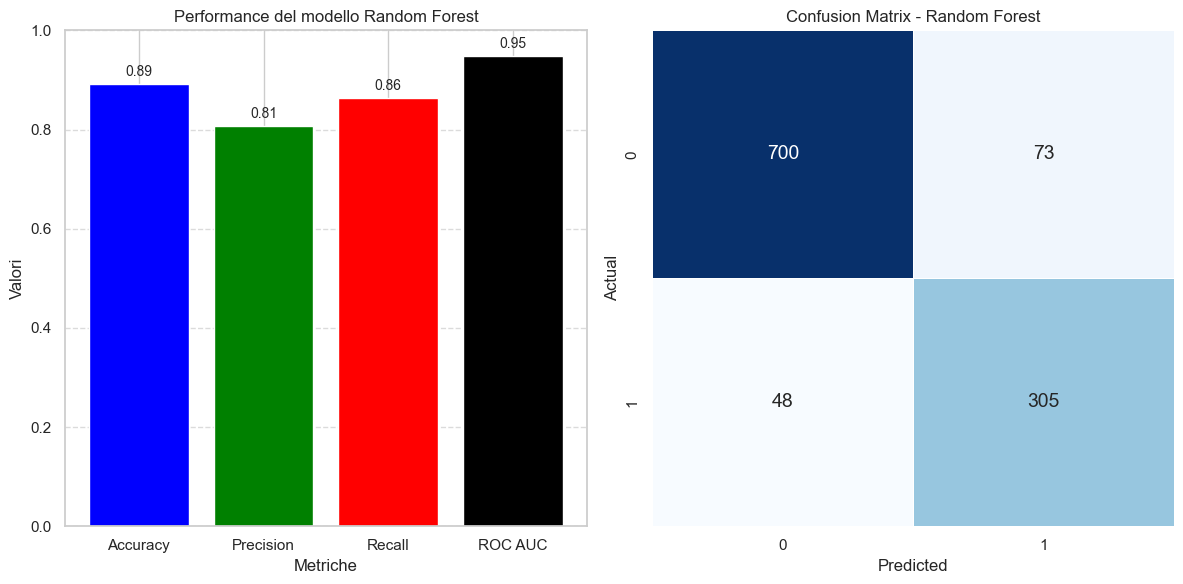

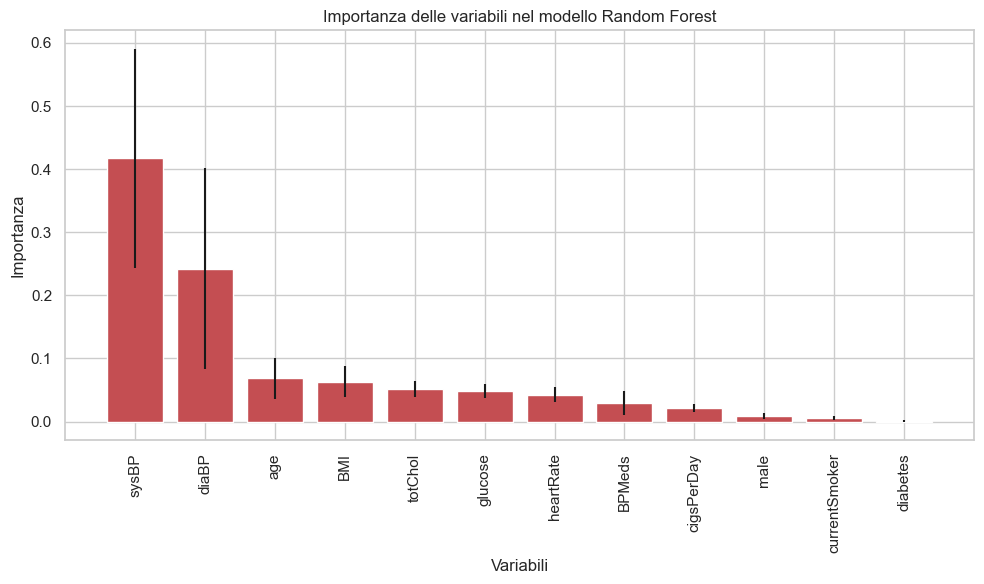

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_rf = [0.8925399644760214, 0.8068783068783069, 0.8640226628895185, 0.948414807105241]

conf_matrix_rf = np.array([[700, 73], [48, 305]])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars_rf = plt.bar(metrics, values_rf, color=['blue', 'green', 'red', 'black'])
for bar, value in zip(bars_rf, values_rf):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello Random Forest')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title("Importanza delle variabili nel modello Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Variabili')
plt.ylabel('Importanza')
plt.tight_layout()
plt.show()


In [40]:
# esempio di Feature Engineering su variabili importanti
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# esempio di normalizzazione su sysBP e diaBP
X_train_fe['sysBP_normalized'] = (X_train_fe['sysBP'] - X_train_fe['sysBP'].mean()) / X_train_fe['sysBP'].std()
X_test_fe['sysBP_normalized'] = (X_test_fe['sysBP'] - X_train_fe['sysBP'].mean()) / X_train_fe['sysBP'].std()

X_train_fe['diaBP_normalized'] = (X_train_fe['diaBP'] - X_train_fe['diaBP'].mean()) / X_train_fe['diaBP'].std()
X_test_fe['diaBP_normalized'] = (X_test_fe['diaBP'] - X_train_fe['diaBP'].mean()) / X_train_fe['diaBP'].std()

# addestramento del modello con feature ingegnerizzate
rf_model_fe = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_fe.fit(X_train_fe, y_train)

# previsioni e valutazione
y_pred_rf_fe = rf_model_fe.predict(X_test_fe)
y_prob_rf_fe = rf_model_fe.predict_proba(X_test_fe)[:, 1]

accuracy_rf_fe = accuracy_score(y_test, y_pred_rf_fe)
precision_rf_fe = precision_score(y_test, y_pred_rf_fe)
recall_rf_fe = recall_score(y_test, y_pred_rf_fe)
roc_auc_rf_fe = roc_auc_score(y_test, y_prob_rf_fe)

print(f'Random Forest with Feature Engineering Accuracy: {accuracy_rf_fe}')
print(f'Random Forest with Feature Engineering Precision: {precision_rf_fe}')
print(f'Random Forest with Feature Engineering Recall: {recall_rf_fe}')
print(f'Random Forest with Feature Engineering ROC AUC: {roc_auc_rf_fe}')

conf_matrix_rf_fe = confusion_matrix(y_test, y_pred_rf_fe)
print(conf_matrix_rf_fe)


Random Forest with Feature Engineering Accuracy: 0.8952042628774423
Random Forest with Feature Engineering Precision: 0.8067885117493473
Random Forest with Feature Engineering Recall: 0.8753541076487252
Random Forest with Feature Engineering ROC AUC: 0.9468279650674866
[[699  74]
 [ 44 309]]


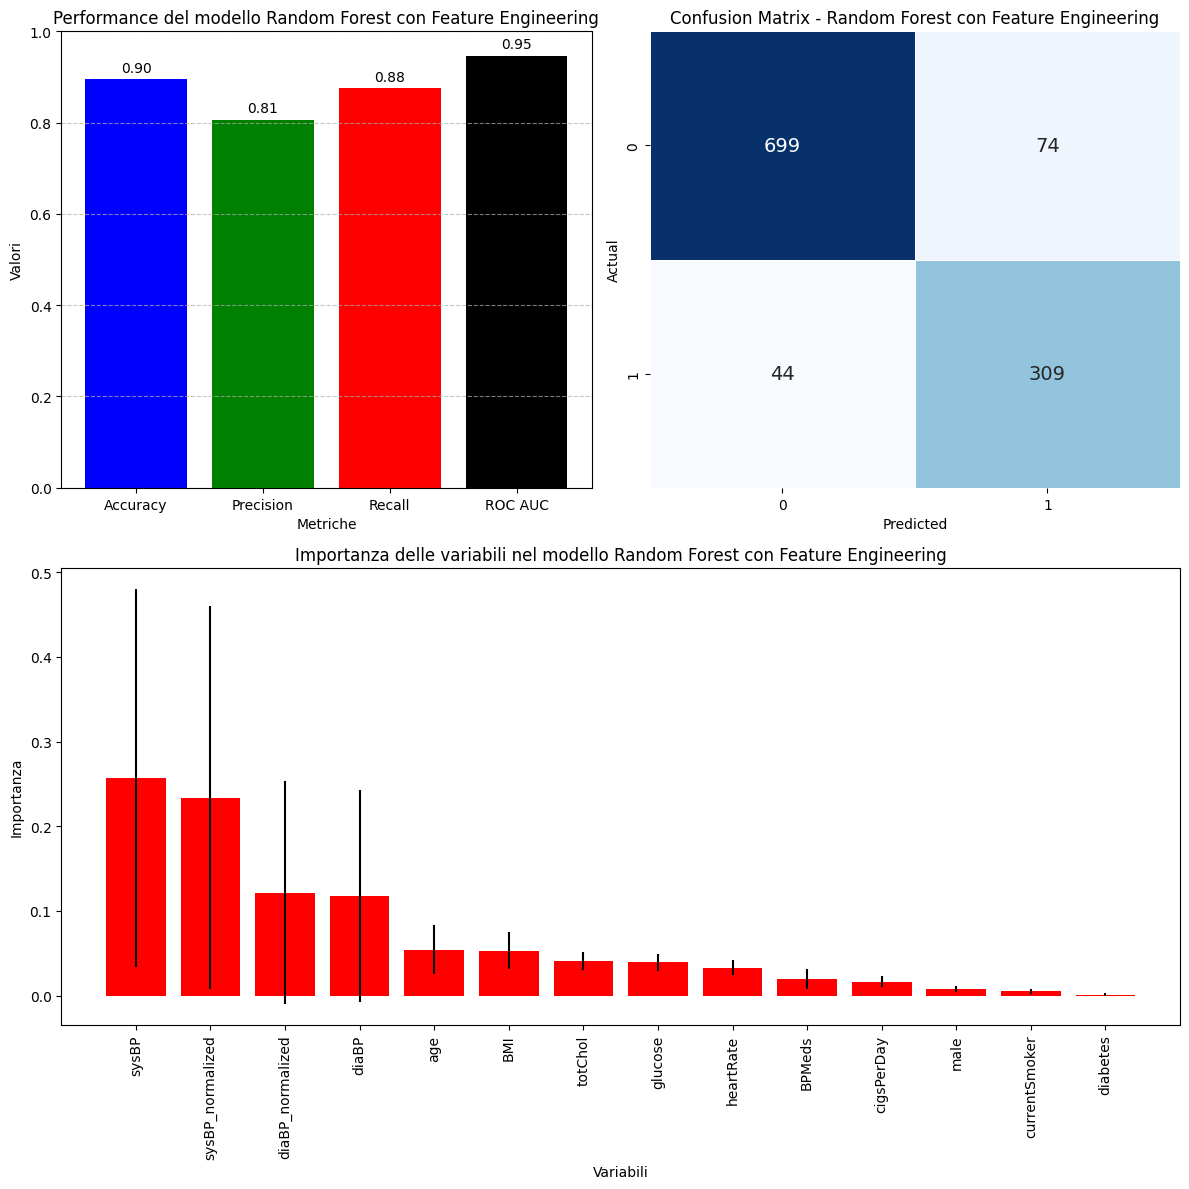

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_fe = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_rf_fe = [0.8952042628774423, 0.8067885117493473, 0.8753541076487252, 0.9468279650674866]

conf_matrix_rf_fe = np.array([[699, 74], [44, 309]])

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
bars_rf_fe = plt.bar(metrics_fe, values_rf_fe, color=['blue', 'green', 'red', 'black'])
for bar, value in zip(bars_rf_fe, values_rf_fe):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Performance del modello Random Forest con Feature Engineering')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_rf_fe, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest con Feature Engineering')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 1, 2)
importances_fe = rf_model_fe.feature_importances_
std_fe = np.std([tree.feature_importances_ for tree in rf_model_fe.estimators_], axis=0)
indices_fe = np.argsort(importances_fe)[::-1]
feature_names_fe = X_train_fe.columns

plt.title("Importanza delle variabili nel modello Random Forest con Feature Engineering")
plt.bar(range(X_train_fe.shape[1]), importances_fe[indices_fe], color="r", yerr=std_fe[indices_fe], align="center")
plt.xticks(range(X_train_fe.shape[1]), feature_names_fe[indices_fe], rotation=90)
plt.xlim([-1, X_train_fe.shape[1]])
plt.xlabel('Variabili')
plt.ylabel('Importanza')
plt.tight_layout()

plt.show()


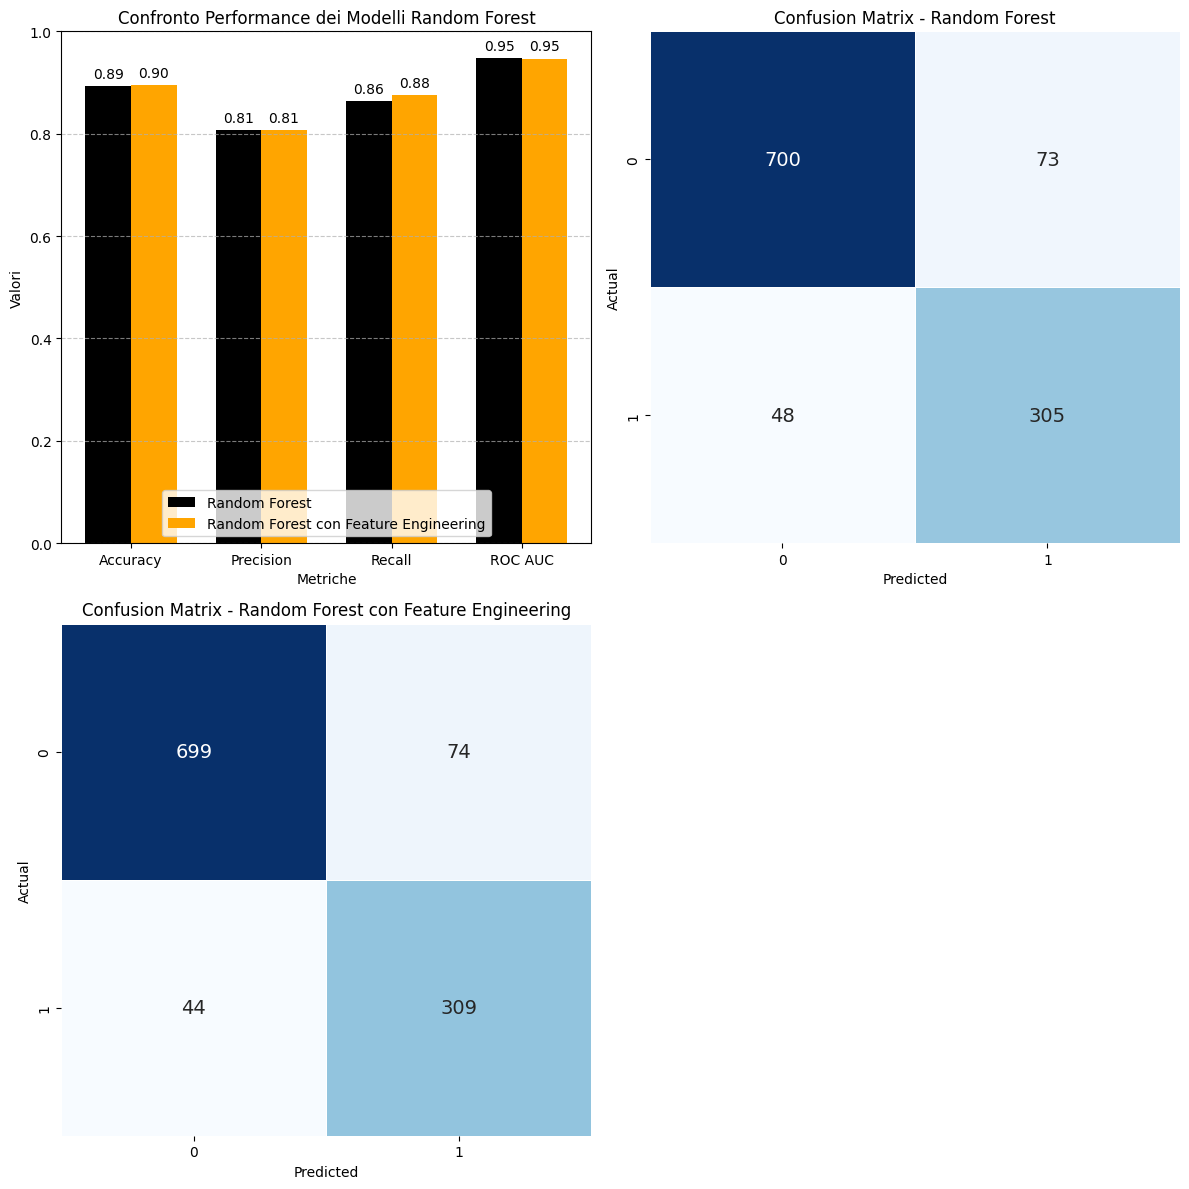

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_rf = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_rf = [0.8925399644760214, 0.8068783068783069, 0.8640226628895185, 0.948414807105241]
conf_matrix_rf = np.array([[700, 73], [48, 305]])

metrics_rf_fe = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_rf_fe = [0.8952042628774423, 0.8067885117493473, 0.8753541076487252, 0.9468279650674866]
conf_matrix_rf_fe = np.array([[699, 74], [44, 309]])

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
bar_width = 0.35
index = np.arange(len(metrics_rf))

bars_rf = plt.bar(index - bar_width/2, values_rf, bar_width, color='black', label='Random Forest')
bars_rf_fe = plt.bar(index + bar_width/2, values_rf_fe, bar_width, color='orange', label='Random Forest con Feature Engineering')

for bar, value in zip(index - bar_width/2, values_rf):
    plt.text(bar, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
for bar, value in zip(index + bar_width/2, values_rf_fe):
    plt.text(bar, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(index, metrics_rf)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Confronto Performance dei Modelli Random Forest')
plt.legend(loc='lower center')  # Sposta la legenda nella parte bassa del grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_rf_fe, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest con Feature Engineering')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Comparative analysis of the metrics and success rates of the best of the three models

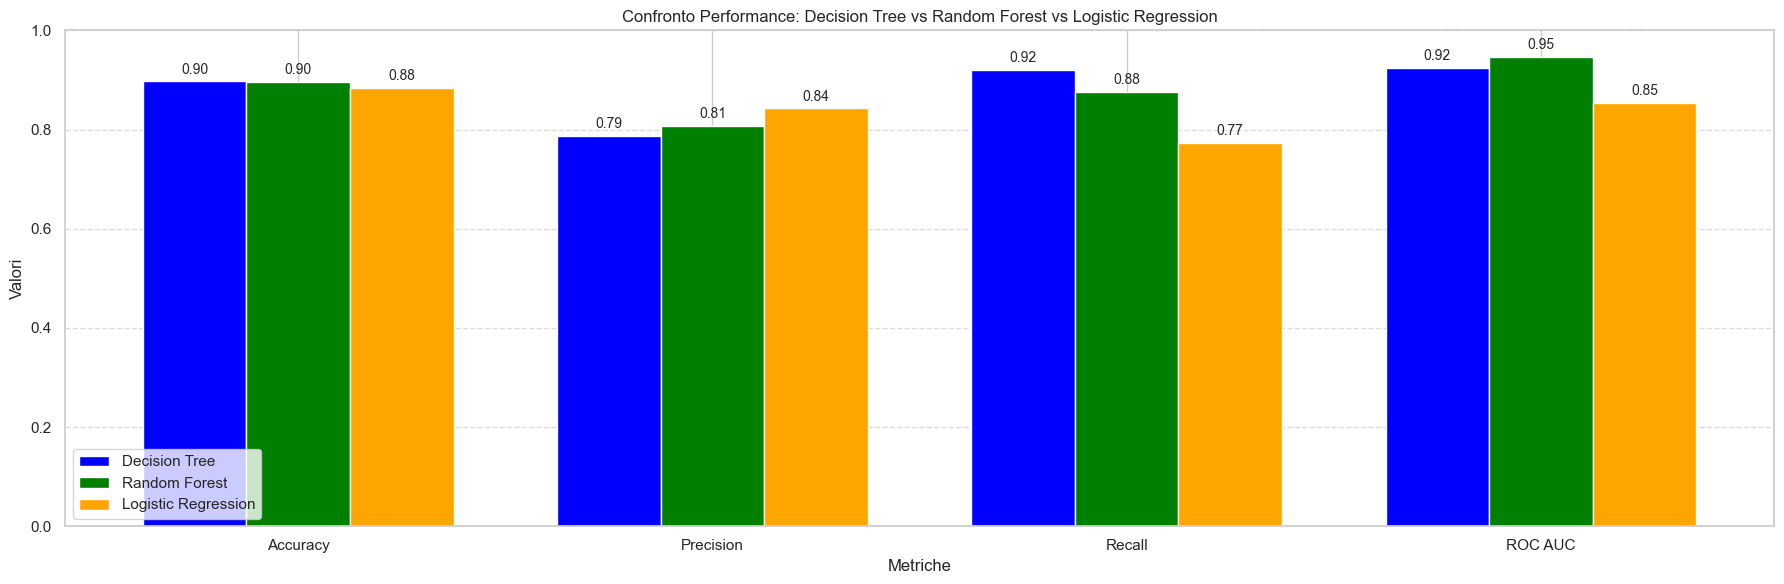

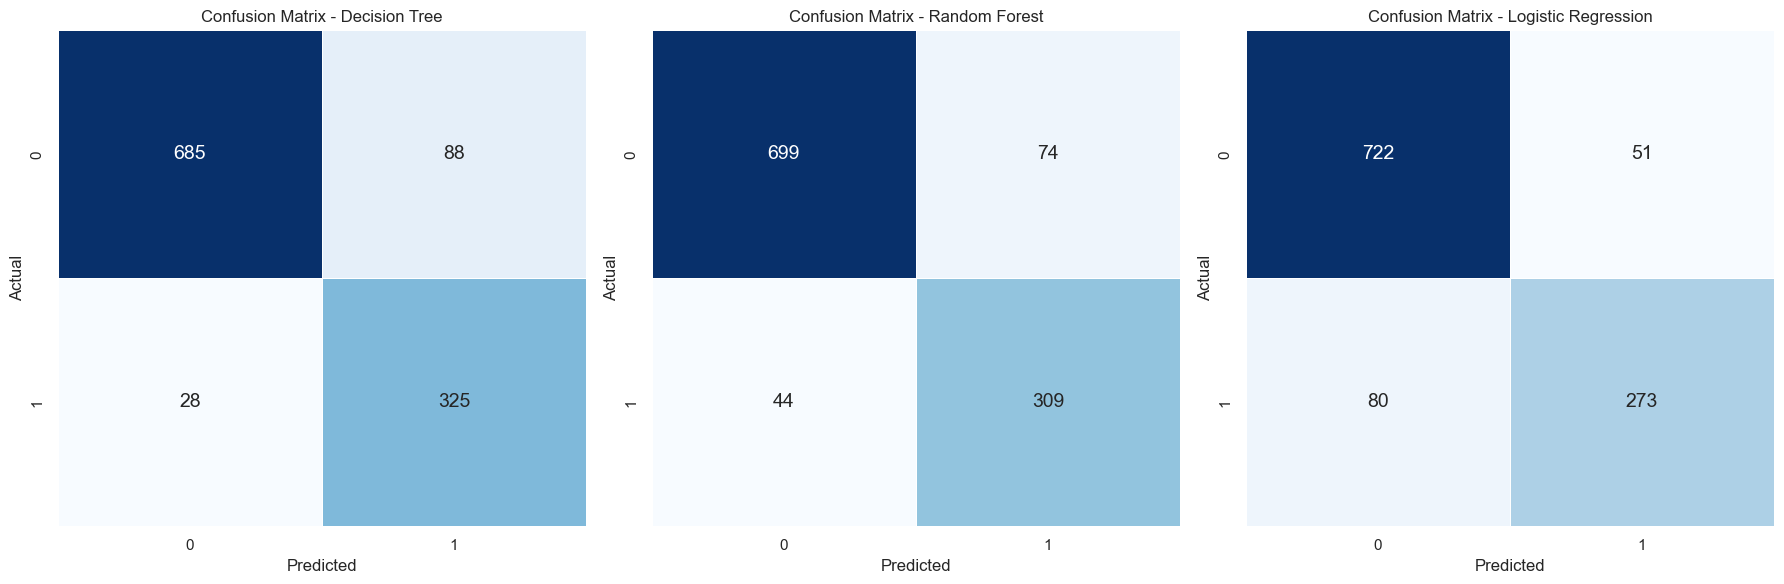

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
values_dt = [0.8969804618117229, 0.7869249394673123, 0.9206798866855525, 0.924738610835236]
values_rf = [0.8952042628774423, 0.8067885117493473, 0.8753541076487252, 0.9468279650674866]
values_lr = [0.8836589698046181, 0.8425925925925926, 0.773371104815864, 0.8536971953574792]

conf_matrix_dt = np.array([[685, 88], [28, 325]])
conf_matrix_rf = np.array([[699, 74], [44, 309]])
conf_matrix_lr = np.array([[722, 51], [80, 273]])

plt.figure(figsize=(18, 6))

bar_width = 0.25
index = np.arange(len(metrics))

bars1 = plt.bar(index - bar_width, values_dt, bar_width, color='blue', label='Decision Tree')
bars2 = plt.bar(index, values_rf, bar_width, color='green', label='Random Forest')
bars3 = plt.bar(index + bar_width, values_lr, bar_width, color='orange', label='Logistic Regression')

for bar, value in zip(bars1, values_dt):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
for bar, value in zip(bars2, values_rf):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
for bar, value in zip(bars3, values_lr):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(index, metrics)
plt.ylim(0, 1)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Confronto Performance: Decision Tree vs Random Forest vs Logistic Regression')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Reputo interessante analizzare i motivi, secondo me, per cui Decision Tree e Random Forest hanno mostrato risultati simili nella predizione dell’etichetta di rischio di ipertensione.

Struttura di base simi.e: Random Forest è essenzialmente un insieme d (Decision Tres) costruiti su campioni di dati bootstrap e con feature selezionate casualmente. Ogni albero all'interno di Random Forest opera in modo simile a un Decision Tree singolo, prendendo decisioni basate su divisioni successive delle variabili predittive.

Flessibilità e complessità control.ata: Entrambi gli algoritmi sono in grado di modellare relazioni non lineari tra le variabili predittive e la variabile di rispone). Tuttavia, mentre un singolo Decision Tree può essere soggetto a overfit, R), Random Forest riesce a mitigare qa possibilitàmble, riducendo la varianza complessiva e spesso migliorando le performance predittdello.

Dimensione del dataset e complessità delle.fProbabilmente, essendoiccolo o le re sono non troppo complesse, la complessità aggiunta di un Random Forest potrebbe non portare a miglioramenti significativi rispetto a un singolo Decision Tree. In queste circostanze, è plausibile osservare risultati simili tra i due approcci.
